In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
file_path = "C:\\Local\\Proyecto ML\\PRODUCT SALES.csv\\PRODUCT_SALES.csv"
df = pd.read_csv(file_path)
df = df[df['Profit']<=20000] #eliminar outliers identificados tras el primer clustering

In [50]:
# Muestra del data set para ver su composicion. 
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
Index: 113034 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113034 non-null  object 
 1   Day               113034 non-null  int64  
 2   Month             113034 non-null  object 
 3   Year              113034 non-null  int64  
 4   Customer_Age      113034 non-null  int64  
 5   Age_Group         113034 non-null  object 
 6   Age_Group_NUMBER  113034 non-null  int64  
 7   Customer_Gender   113034 non-null  object 
 8   Country           113034 non-null  object 
 9   Product_Category  113034 non-null  object 
 10  Order_Quantity    113034 non-null  int64  
 11  Unit_Cost         113034 non-null  float64
 12  Unit_Price        113034 non-null  float64
 13  Profit            113034 non-null  float64
 14  Cost              113034 non-null  float64
 15  Revenue           113034 non-null  float64
dtypes: float64(5), int64(5), 

(None,
        Date  Day    Month  Year  Customer_Age             Age_Group  \
 0  01-01-17    1  January  2017            17           Youth (<25)   
 1  01-01-17    1  January  2017            23           Youth (<25)   
 2  01-01-17    1  January  2017            33  Young Adults (25-34)   
 3  01-01-17    1  January  2017            39        Adults (35-64)   
 4  01-01-17    1  January  2017            42        Adults (35-64)   
 
    Age_Group_NUMBER Customer_Gender        Country Product_Category  \
 0                 1               M         canada            Bikes   
 1                 1               M      Australia            Bikes   
 2                 1               F         France            Bikes   
 3                 1               M  United States            Bikes   
 4                 1               M  United States            Bikes   
 
    Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost  Revenue  
 0               2     1519.0      2443.0  1848.0  3038.

In [51]:
# Fechas a objeto datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')


# Convertir clumnas 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'Product_Category' a tipo categorica
columns_to_convert = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'Product_Category']
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Mostrar información actualizada
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113034 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113034 non-null  datetime64[ns]
 1   Day               113034 non-null  int64         
 2   Month             113034 non-null  category      
 3   Year              113034 non-null  int64         
 4   Customer_Age      113034 non-null  int64         
 5   Age_Group         113034 non-null  category      
 6   Age_Group_NUMBER  113034 non-null  int64         
 7   Customer_Gender   113034 non-null  category      
 8   Country           113034 non-null  category      
 9   Product_Category  113034 non-null  category      
 10  Order_Quantity    113034 non-null  int64         
 11  Unit_Cost         113034 non-null  float64       
 12  Unit_Price        113034 non-null  float64       
 13  Profit            113034 non-null  float64       
 14  Cost     

In [52]:
# Revisar datos y valores inusuales en las columnas categóricas
for column in columns_to_convert:
    print(f"Unique values in {column}:", df[column].unique())

# Evaluar la necesidad de 'Age_group_number' comparandola con 'Age_group'
age_group_comparison = df[['Age_Group', 'Age_Group_NUMBER']].drop_duplicates()

age_group_comparison, df.describe(include='all')

Unique values in Month: ['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']
Unique values in Age_Group: ['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (64+)']
Categories (4, object): ['Adults (35-64)', 'Seniors (64+)', 'Young Adults (25-34)', 'Youth (<25)']
Unique values in Customer_Gender: ['M', 'F']
Categories (2, object): ['F', 'M']
Unique values in Country: ['canada', 'Australia', 'France', 'United States', 'United Kingdom', 'Germany']
Categories (6, object): ['Australia', 'France', 'Germany', 'United Kingdom', 'United States', 'canada']
Unique values in Product_Category: ['Bikes', 'Accessories', 'Clothing']
Categories (3, object): ['Accessories', 'Bikes', 'Clothing']


(               Age_Group  Age_Group_NUMBER
 0            Youth (<25)                 1
 2   Young Adults (25-34)                 1
 3         Adults (35-64)                 1
 86         Seniors (64+)                 1,
                                  Date            Day   Month           Year  \
 count                          113034  113034.000000  113034  113034.000000   
 unique                            NaN            NaN      12            NaN   
 top                               NaN            NaN    June            NaN   
 freq                              NaN            NaN   11234            NaN   
 mean    2020-01-06 01:40:22.485269760      15.665605     NaN    2019.520162   
 min               2017-01-01 00:00:00       1.000000     NaN    2017.000000   
 25%               2019-01-09 00:00:00       8.000000     NaN    2019.000000   
 50%               2019-10-16 00:00:00      16.000000     NaN    2019.500000   
 75%               2021-01-28 00:00:00      23.000000     N

In [53]:
# Eliminar la columna 'Age_Group_NUMBER'
df.drop('Age_Group_NUMBER', axis=1, inplace=True)

# Revision final en busca de outliers
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_summary = df[numeric_columns].describe()

numeric_summary

Day           Year   Customer_Age  Order_Quantity  \
count  113034.000000  113034.000000  113034.000000   113034.000000   
mean       15.665605    2019.520162      35.918927       11.901375   
std         8.781574       1.179705      11.021826        9.561701   
min         1.000000    2017.000000      17.000000        1.000000   
25%         8.000000    2019.000000      28.000000        2.000000   
50%        16.000000    2019.500000      35.000000       10.000000   
75%        23.000000    2021.000000      43.000000       20.000000   
max        31.000000    2021.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113034.000000  113034.000000  113034.000000  113034.000000   
mean      267.274873     452.904259     372.241078     468.592777   
std       549.816606     922.043597     585.795896     867.859586   
min         1.000000       2.000000       1.000000       1.000000   
25%         2.000000       5.000000      39.000000      28.000000   
50%         9.000000      24.000000     135.000000     108.000000   
75%        42.000000      70.000000     432.000000     432.000000   
max      2171.000000    3578.000000    5952.000000    8684.000000   

             Revenue  
count  113034.000000  
mean      840.833855  
std      1439.729969  
min         2.000000  
25%        70.000000  
50%       245.000000  
75%       880.000000  
max     14312.000000

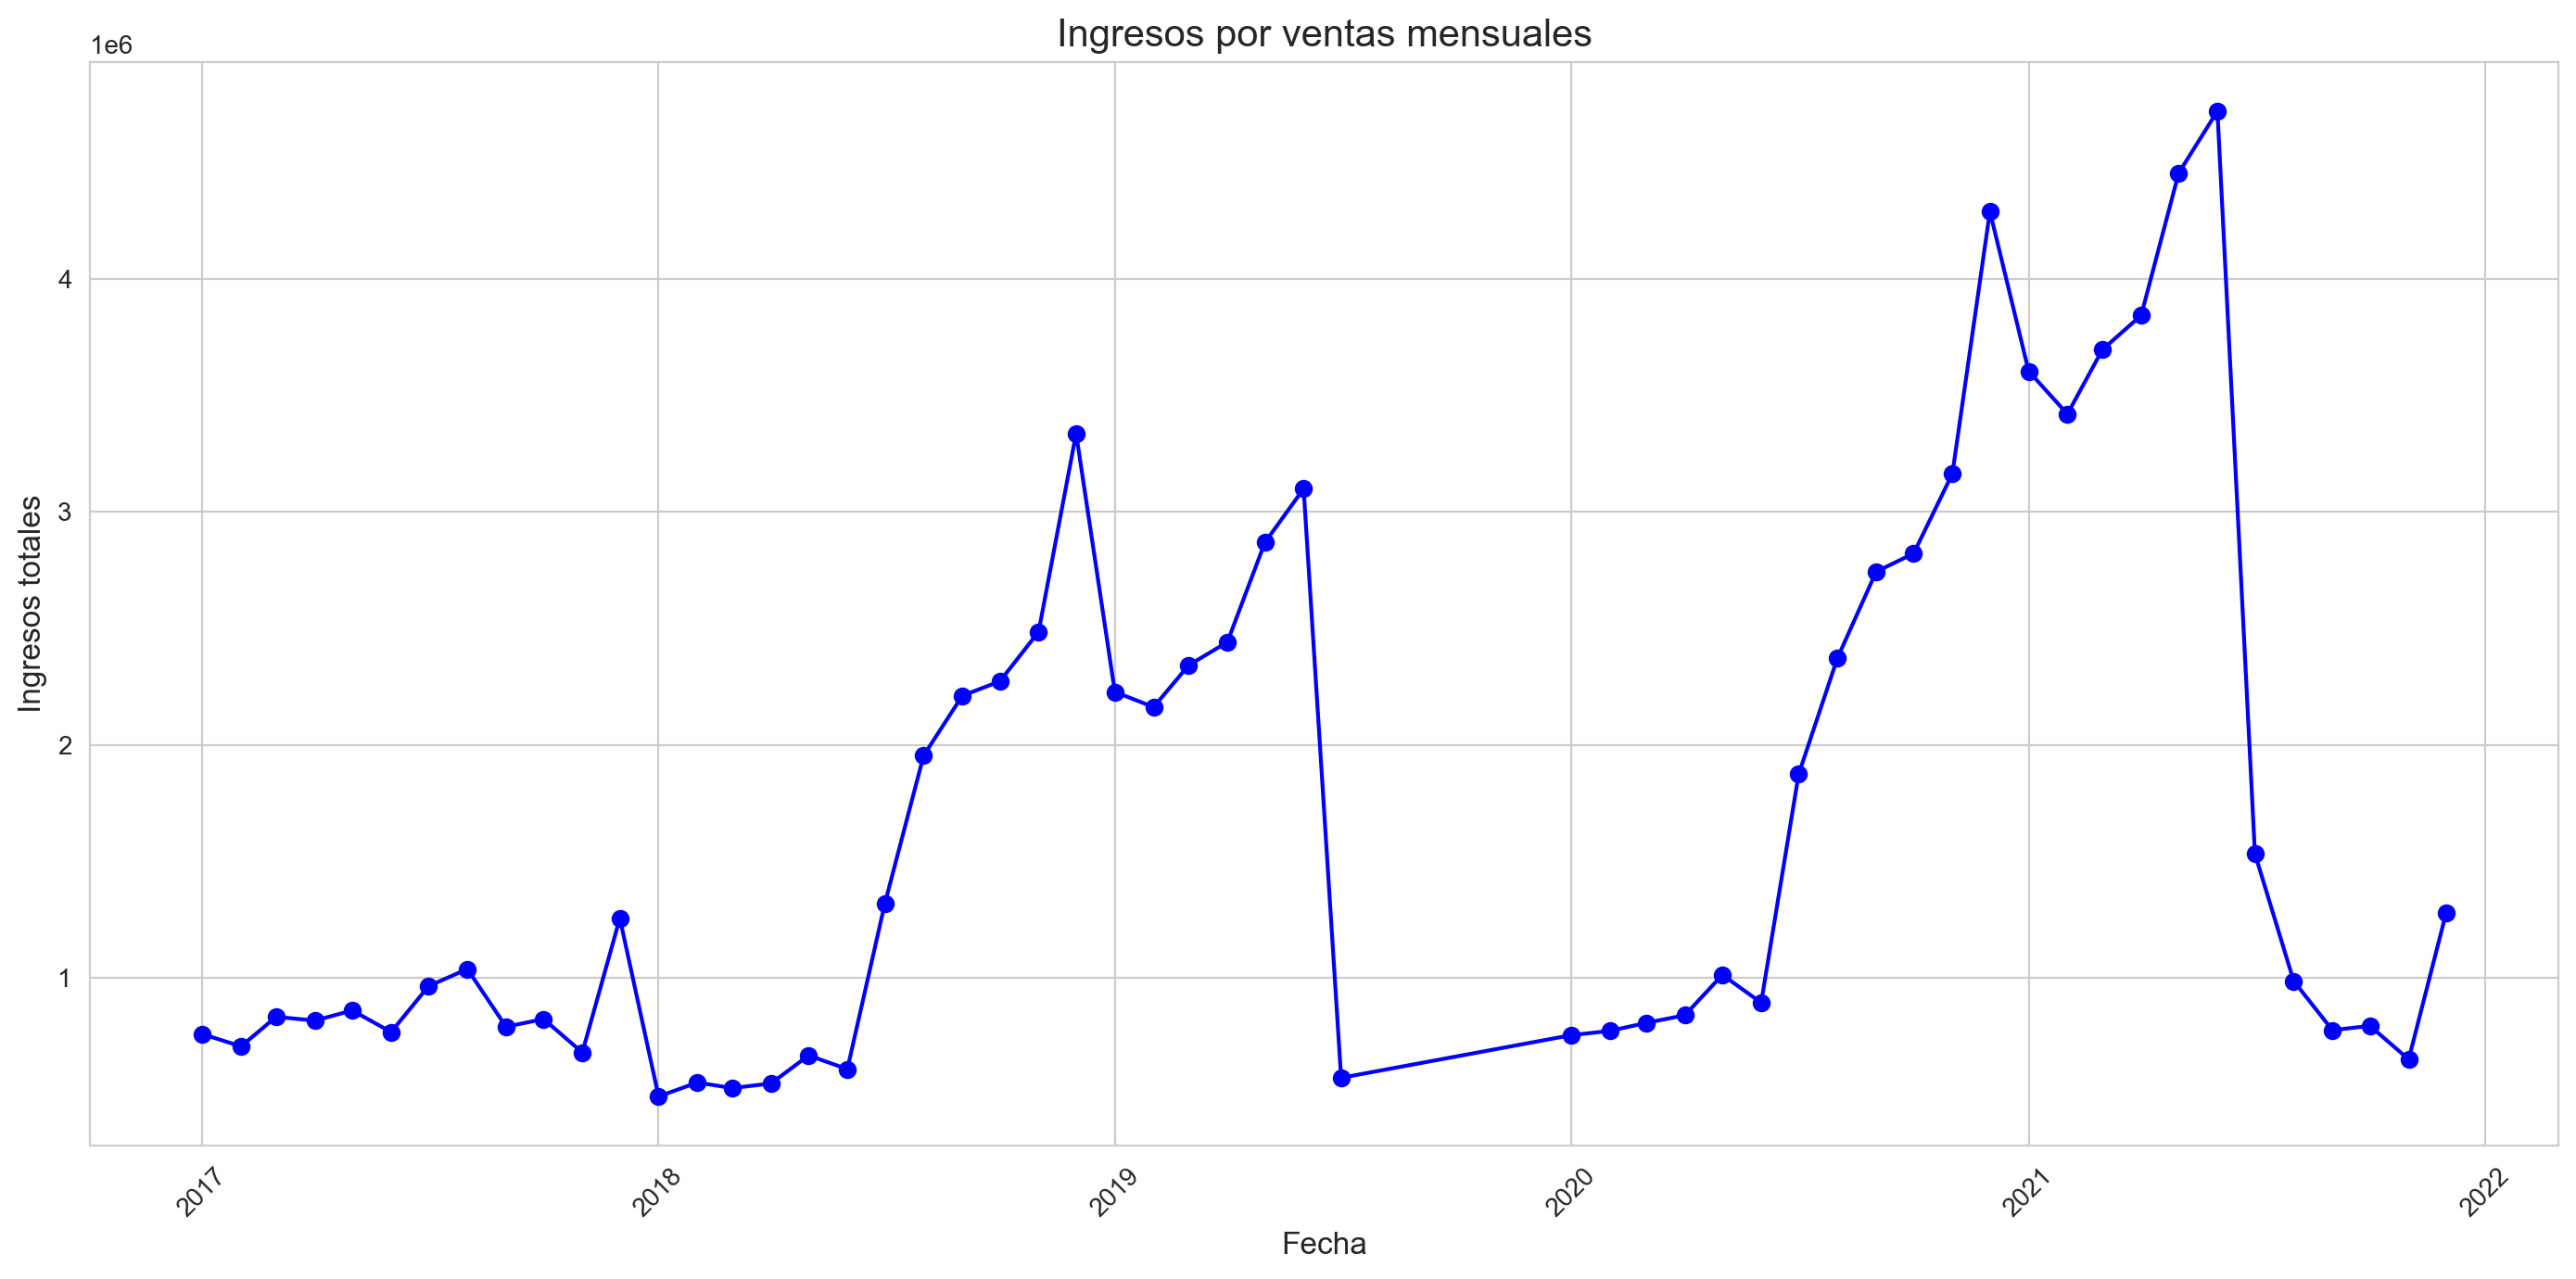

In [74]:
# Establecer el estilo
sns.set_style("whitegrid")

# Tendencias de venta
# Agrupamos los datos por fecha y sumamos los ingresos para ver la evolucion de ingresos en un marco temporal. 
sales_trends = df.groupby(df['Date'].dt.to_period("M"))['Revenue'].sum().reset_index()
sales_trends['Date'] = sales_trends['Date'].dt.to_timestamp()  # Cambiarlo a timestamp para el plot

# PLot
plt.figure(figsize=(14, 7), dpi=200)
plt.plot(sales_trends['Date'], sales_trends['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Ingresos por ventas mensuales', fontsize=15)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos totales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  

# Mostrar plot
plt.show()

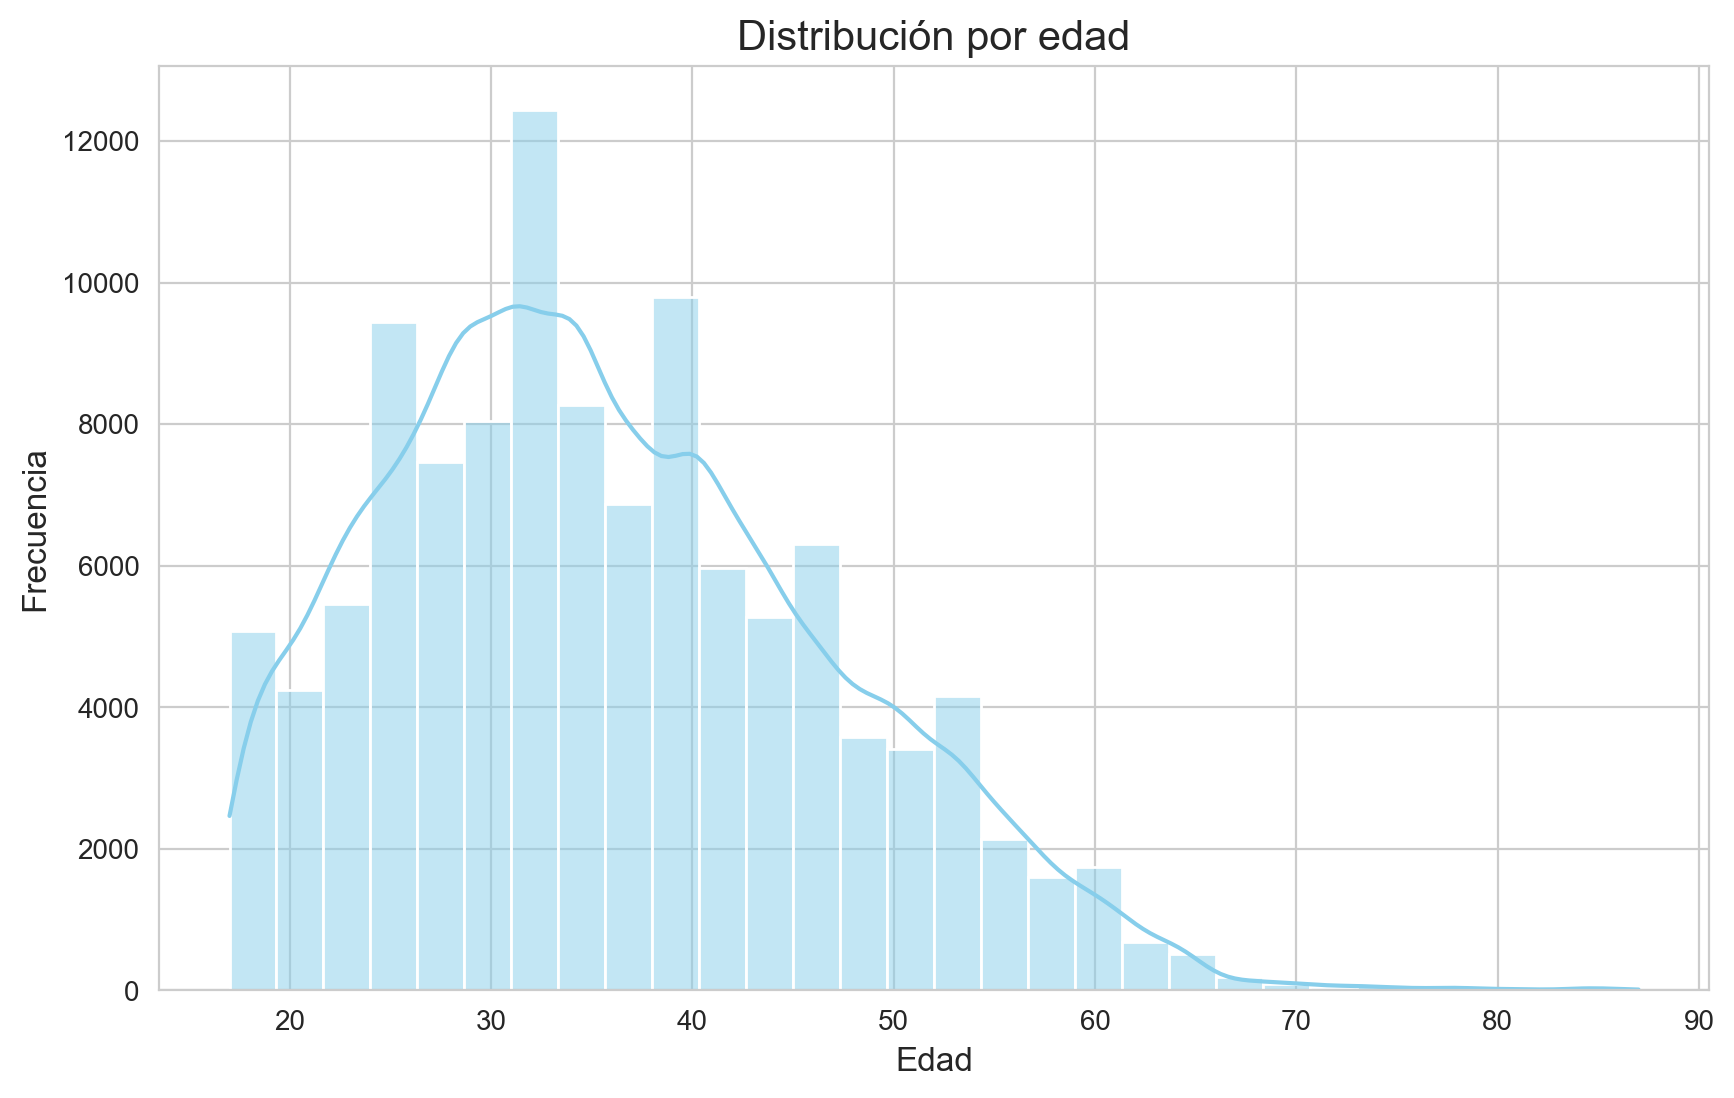

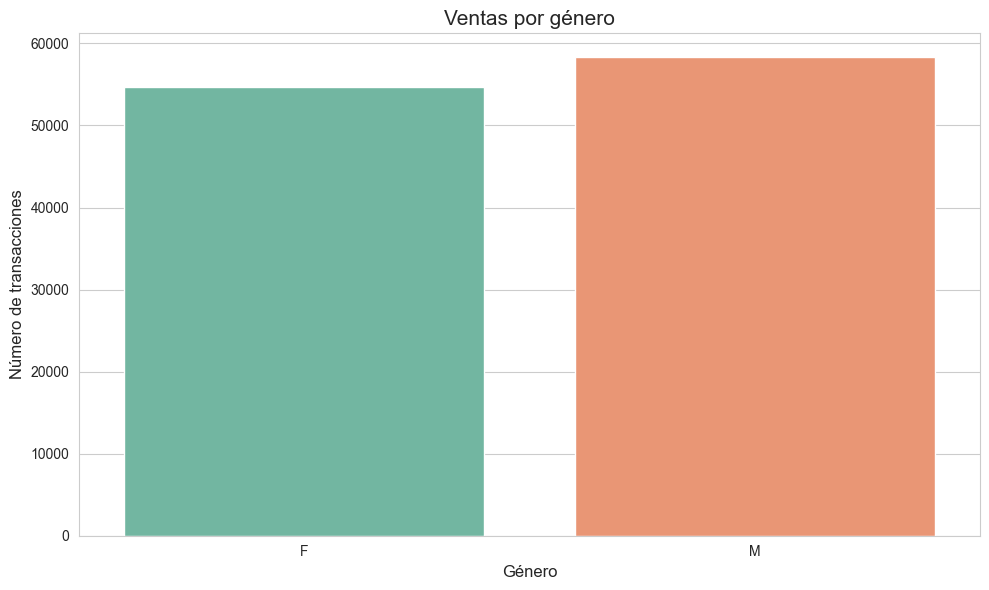

In [75]:
# Analisis de clientes

# Distribucion por edad. 
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(df['Customer_Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribución por edad', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Distribucion por genero
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Customer_Gender', palette='Set2')
plt.title('Ventas por género', fontsize=15)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de transacciones', fontsize=12)


plt.tight_layout()
plt.show()


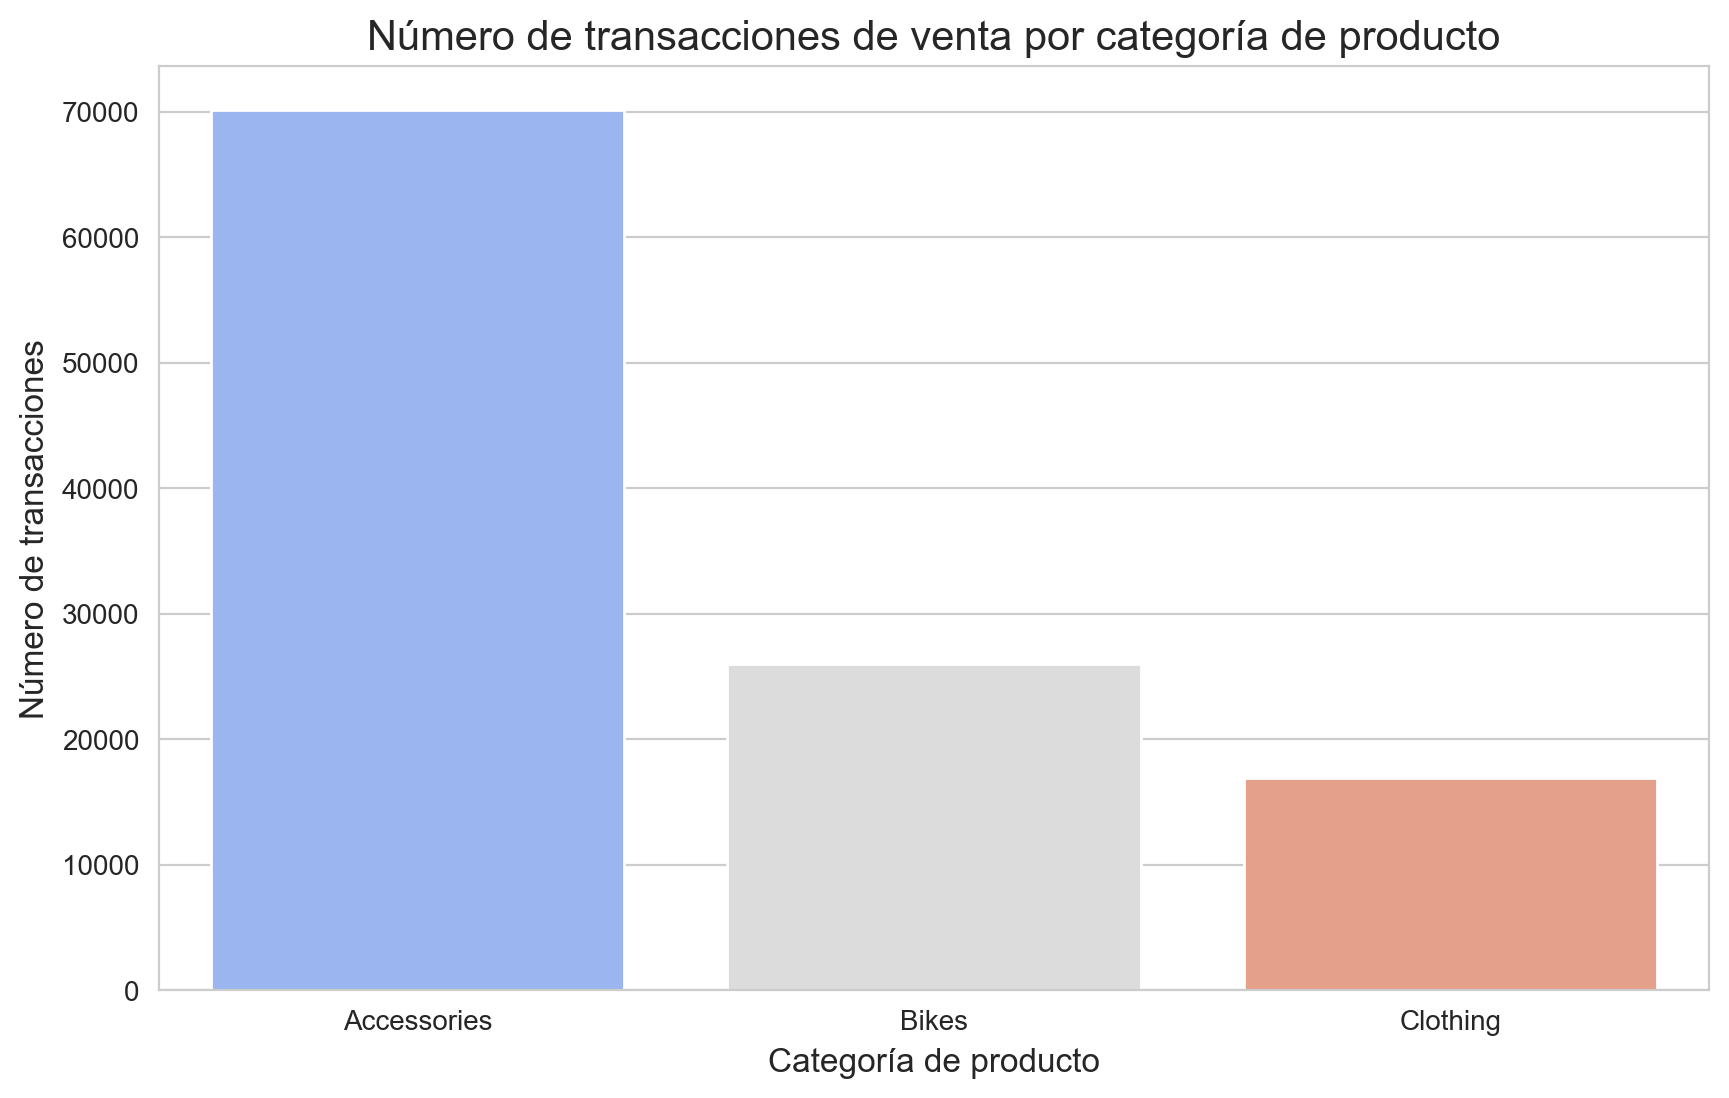

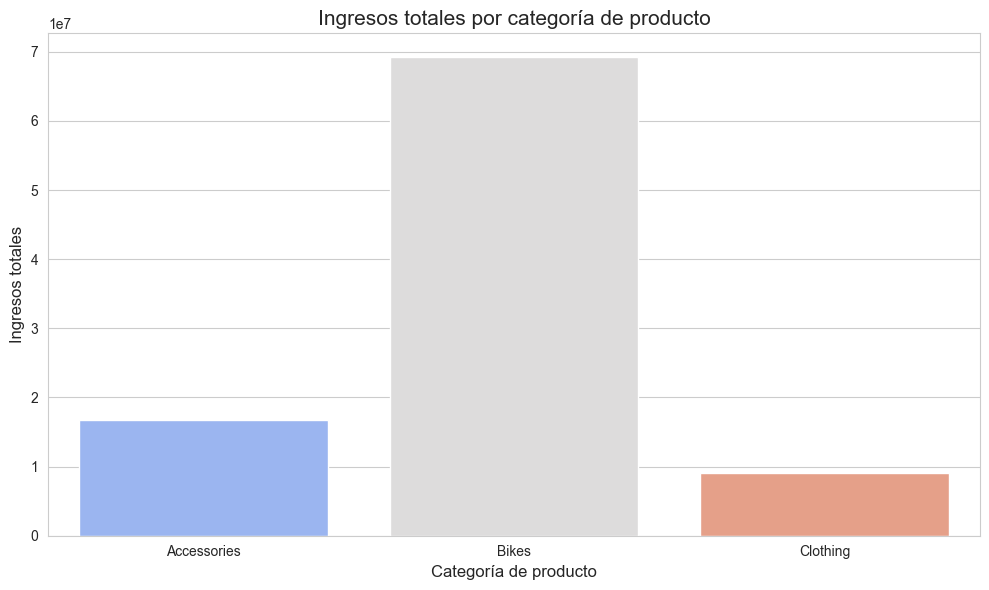

In [76]:
# Analisis de rendimiento de los productos

# Número de Transacciones de Ventas por Categoría de Producto
plt.figure(figsize=(10, 6), dpi=200)
sns.countplot(data=df, x='Product_Category', palette='coolwarm')
plt.title('Número de transacciones de venta por categoría de producto', fontsize=15)
plt.xlabel('Categoría de producto', fontsize=12)
plt.ylabel('Número de transacciones', fontsize=12)

# Ingresos Totales por Categoría de Producto
revenue_by_category = df.groupby('Product_Category')['Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_category, x='Product_Category', y='Revenue', palette='coolwarm')
plt.title('Ingresos totales por categoría de producto', fontsize=15)
plt.xlabel('Categoría de producto', fontsize=12)
plt.ylabel('Ingresos totales', fontsize=12)

# Show plots
plt.tight_layout()
plt.show()

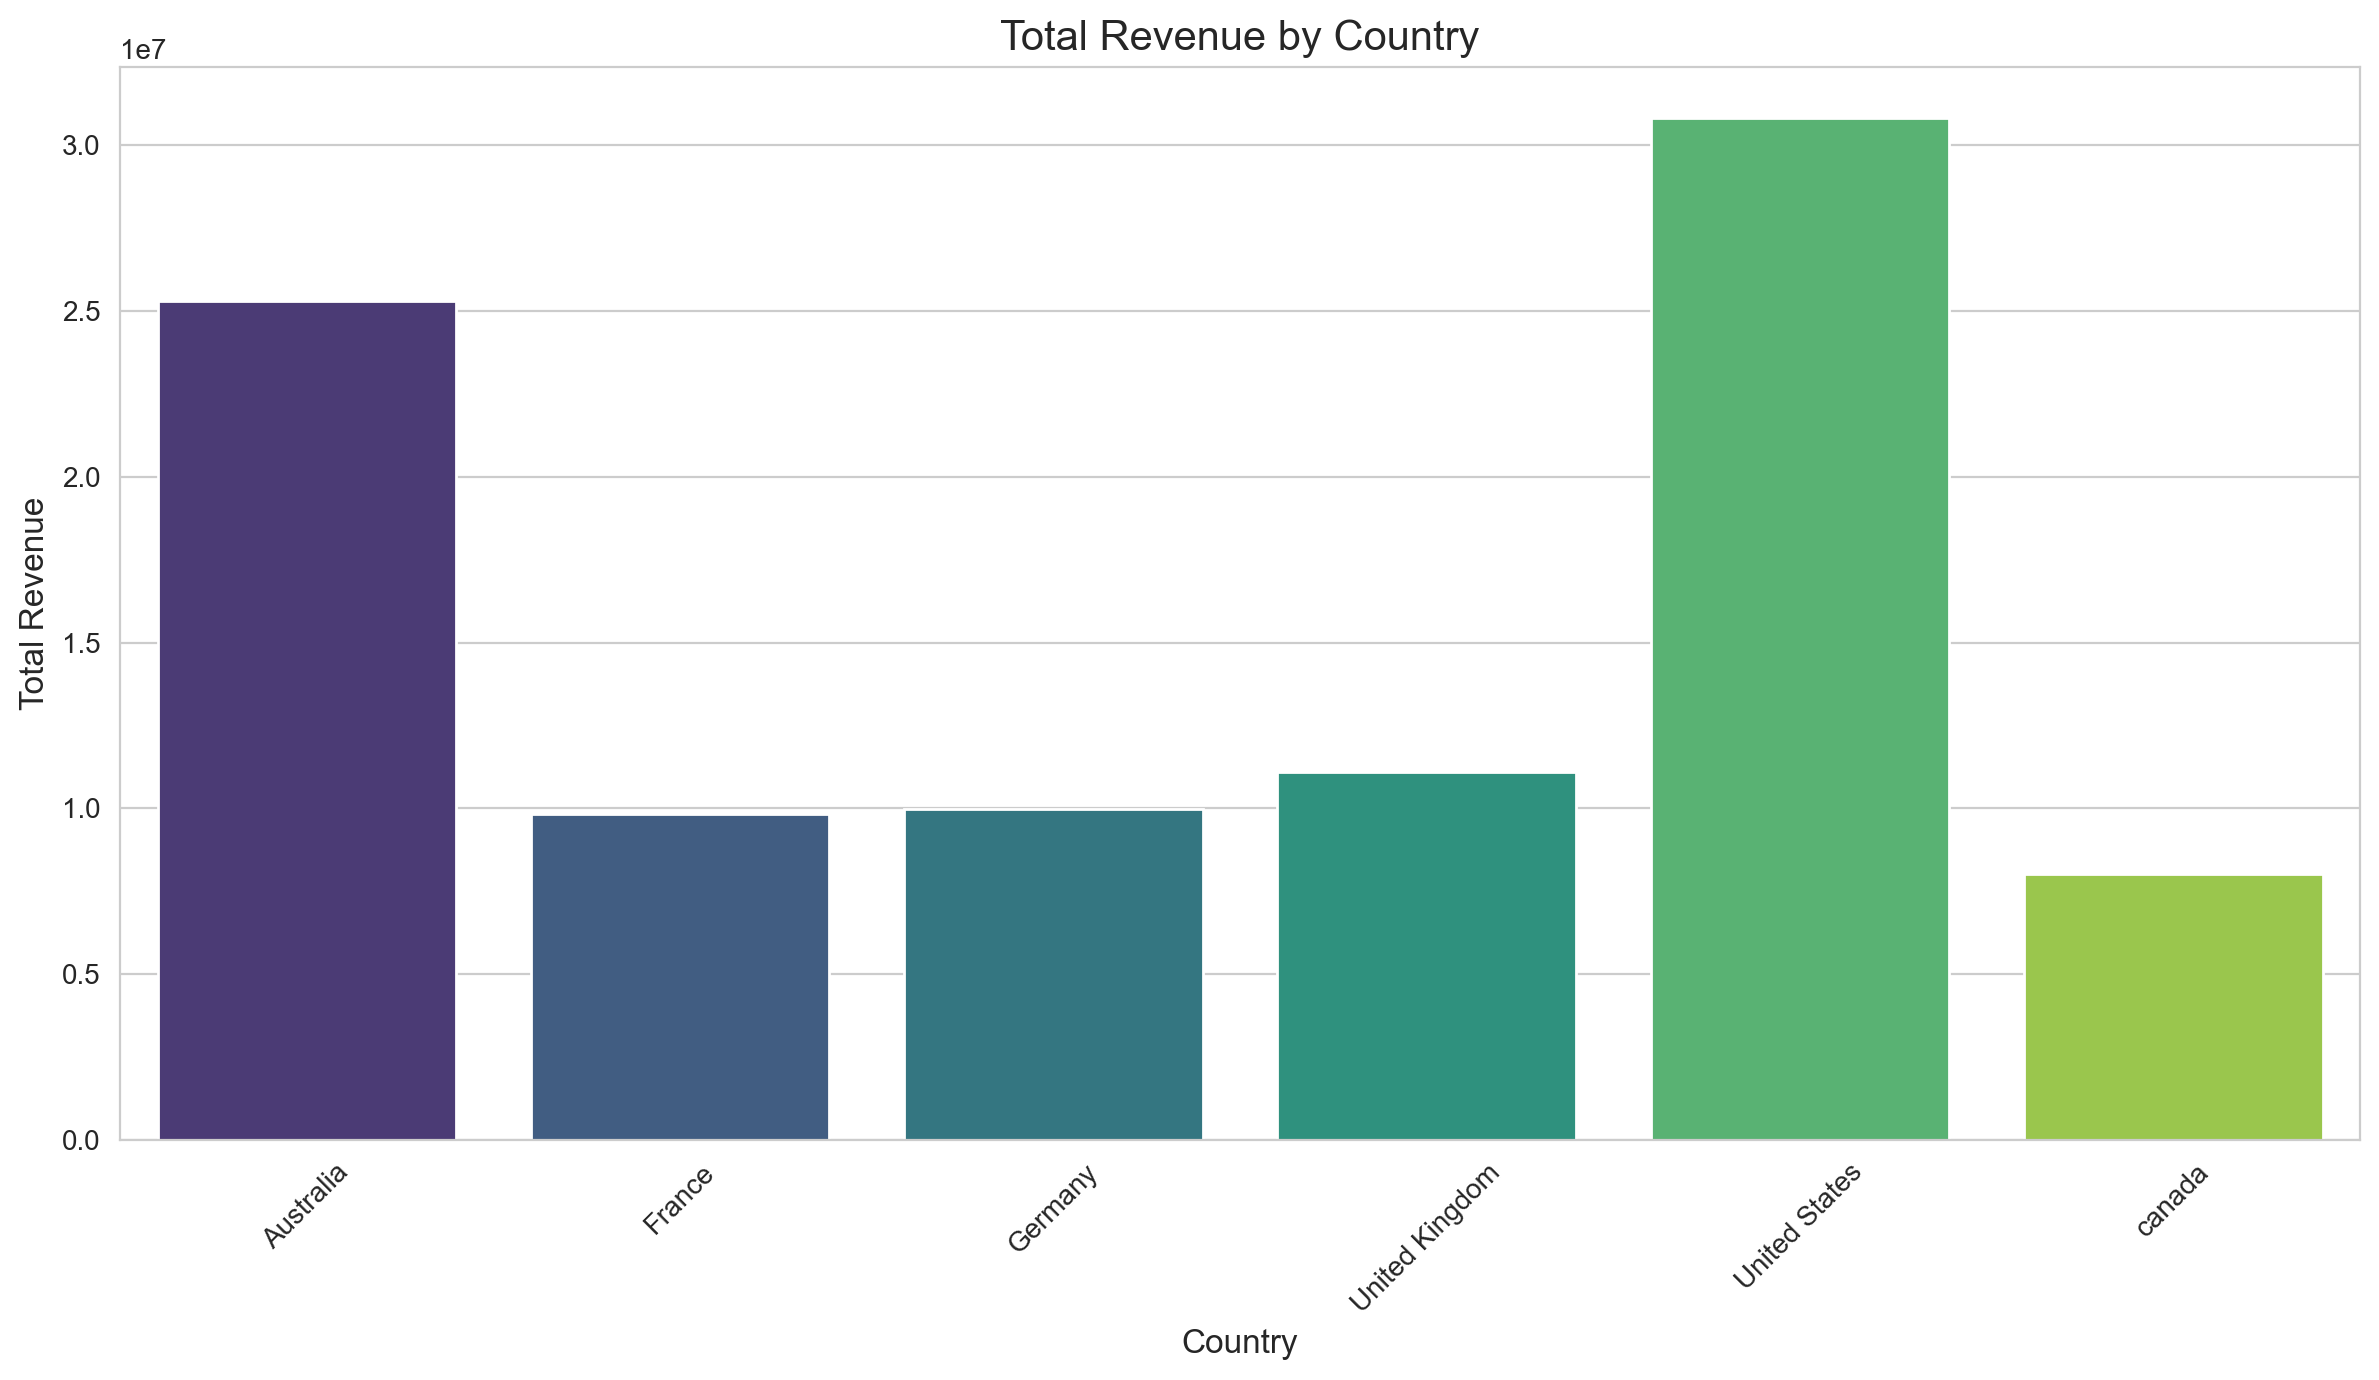

In [57]:
# ingresos totales por pais

revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7), dpi=200)
sns.barplot(data=revenue_by_country, x='Country', y='Revenue', palette='viridis')
plt.title('Total Revenue by Country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

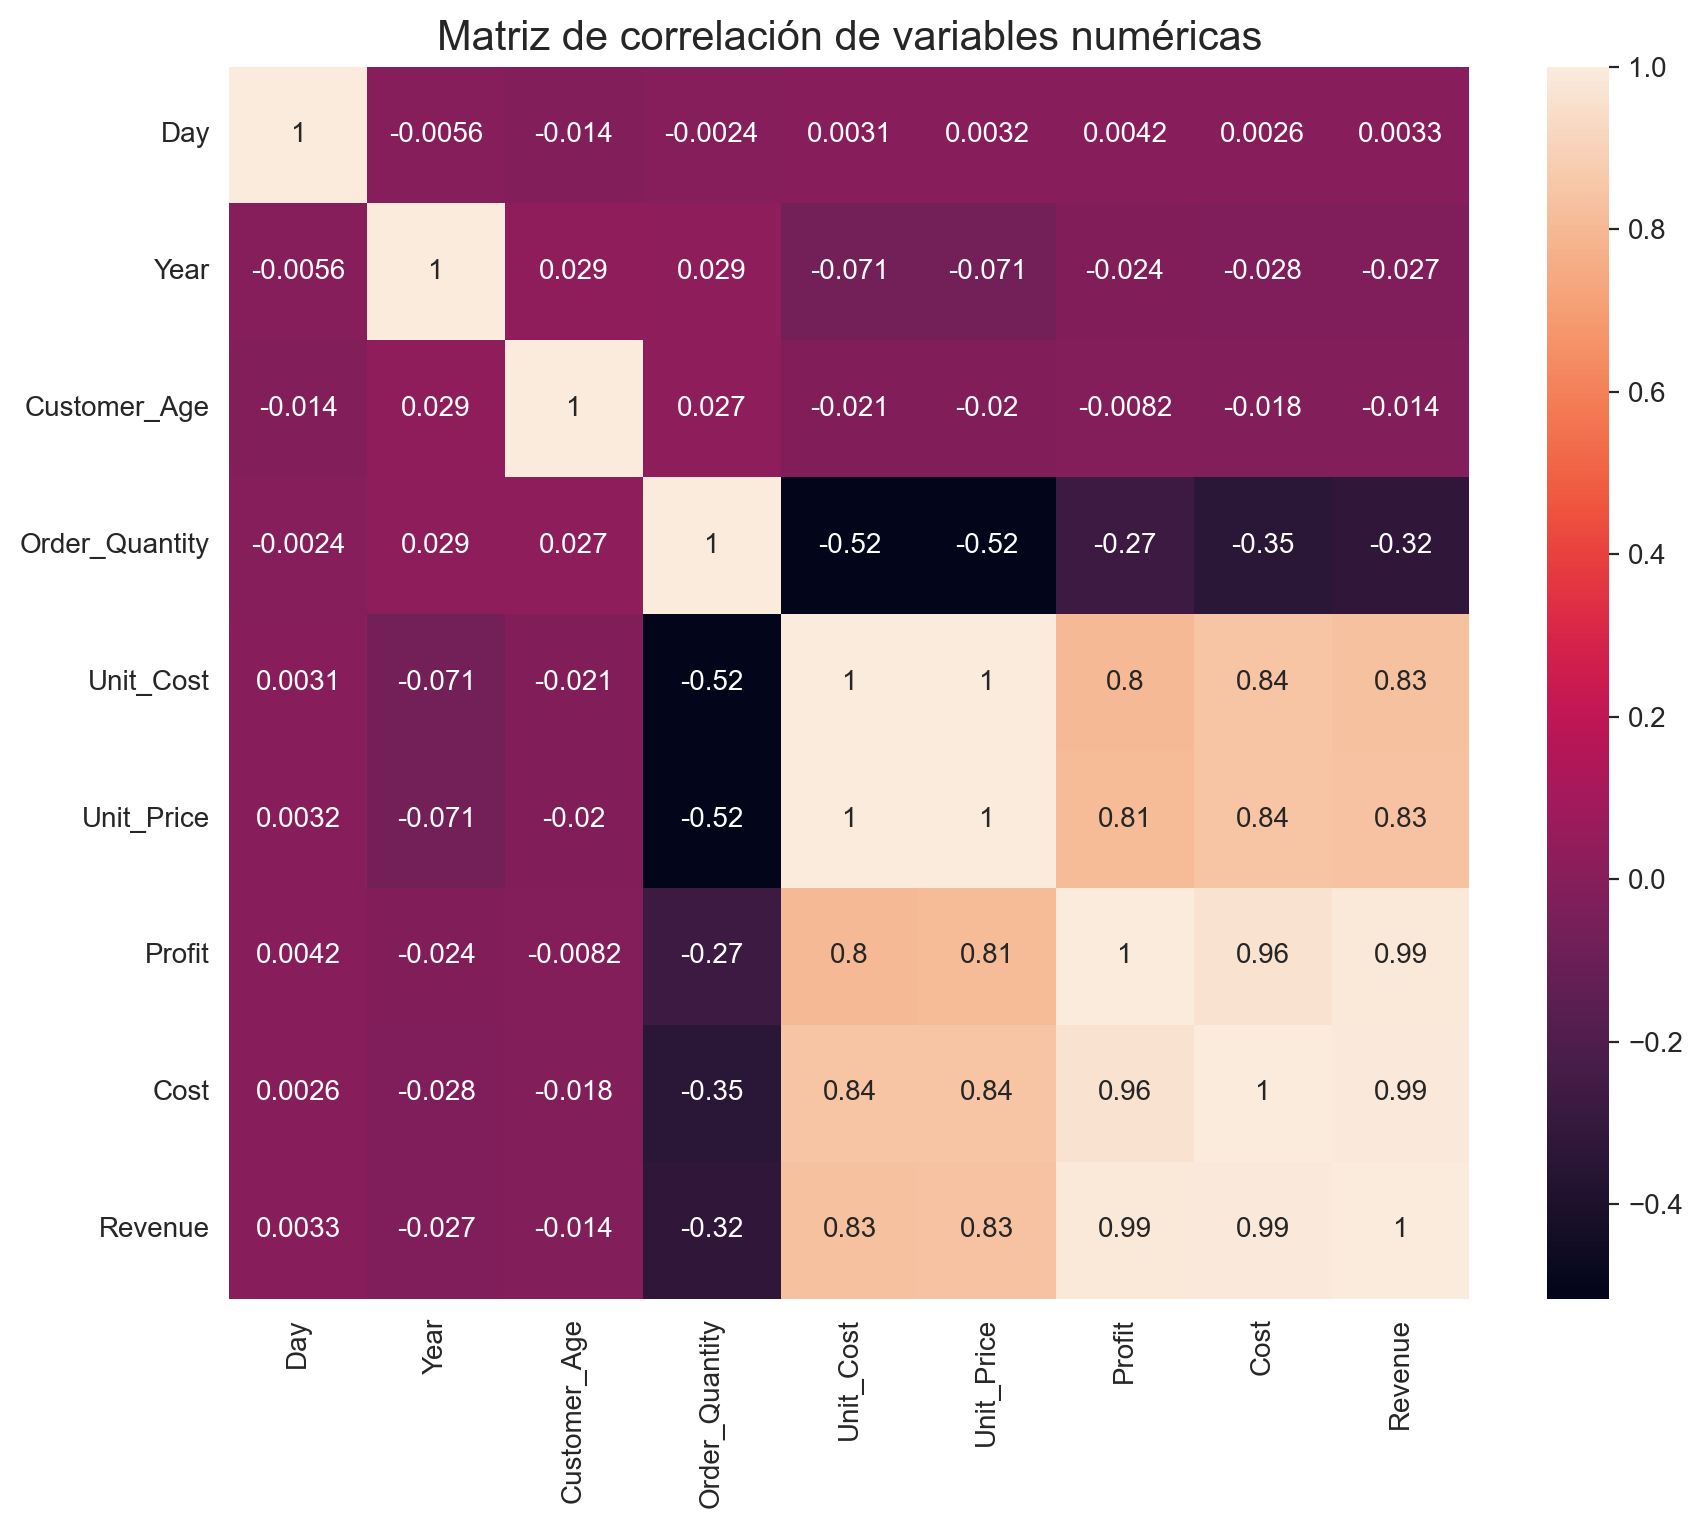

Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.005646     -0.014321       -0.002440   0.003096   
Year           -0.005646  1.000000      0.029046        0.028559  -0.071253   
Customer_Age   -0.014321  0.029046      1.000000        0.026844  -0.021433   
Order_Quantity -0.002440  0.028559      0.026844        1.000000  -0.515936   
Unit_Cost       0.003096 -0.071253     -0.021433       -0.515936   1.000000   
Unit_Price      0.003172 -0.070562     -0.020317       -0.516020   0.997894   
Profit          0.004195 -0.024131     -0.008206       -0.274442   0.799207   
Cost            0.002600 -0.028219     -0.017548       -0.348475   0.844327   
Revenue         0.003274 -0.026829     -0.013917       -0.321723   0.834135   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003172  0.004195  0.002600  0.003274  
Year             -0.070562 -0.024131 -0.028219 -0.026829  
Customer_Age     -0.020317 -0.008206 -0.017548 -0.013917  
Order_Quantity   -0.516020 -0.274442 -0.348475 -0.321723  
Unit_Cost         0.997894  0.799207  0.844327  0.834135  
Unit_Price        1.000000  0.806378  0.840782  0.834916  
Profit            0.806378  1.000000  0.960373  0.985785  
Cost              0.840782  0.960373  1.000000  0.993549  
Revenue           0.834916  0.985785  0.993549  1.000000

In [77]:
# Calcular matriz de correlación
correlation_matrix = df[numeric_columns].corr()

# Mostrar matriz
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(correlation_matrix, annot=True, )
plt.title('Matriz de correlación de variables numéricas', fontsize=15)
plt.show()

correlation_matrix

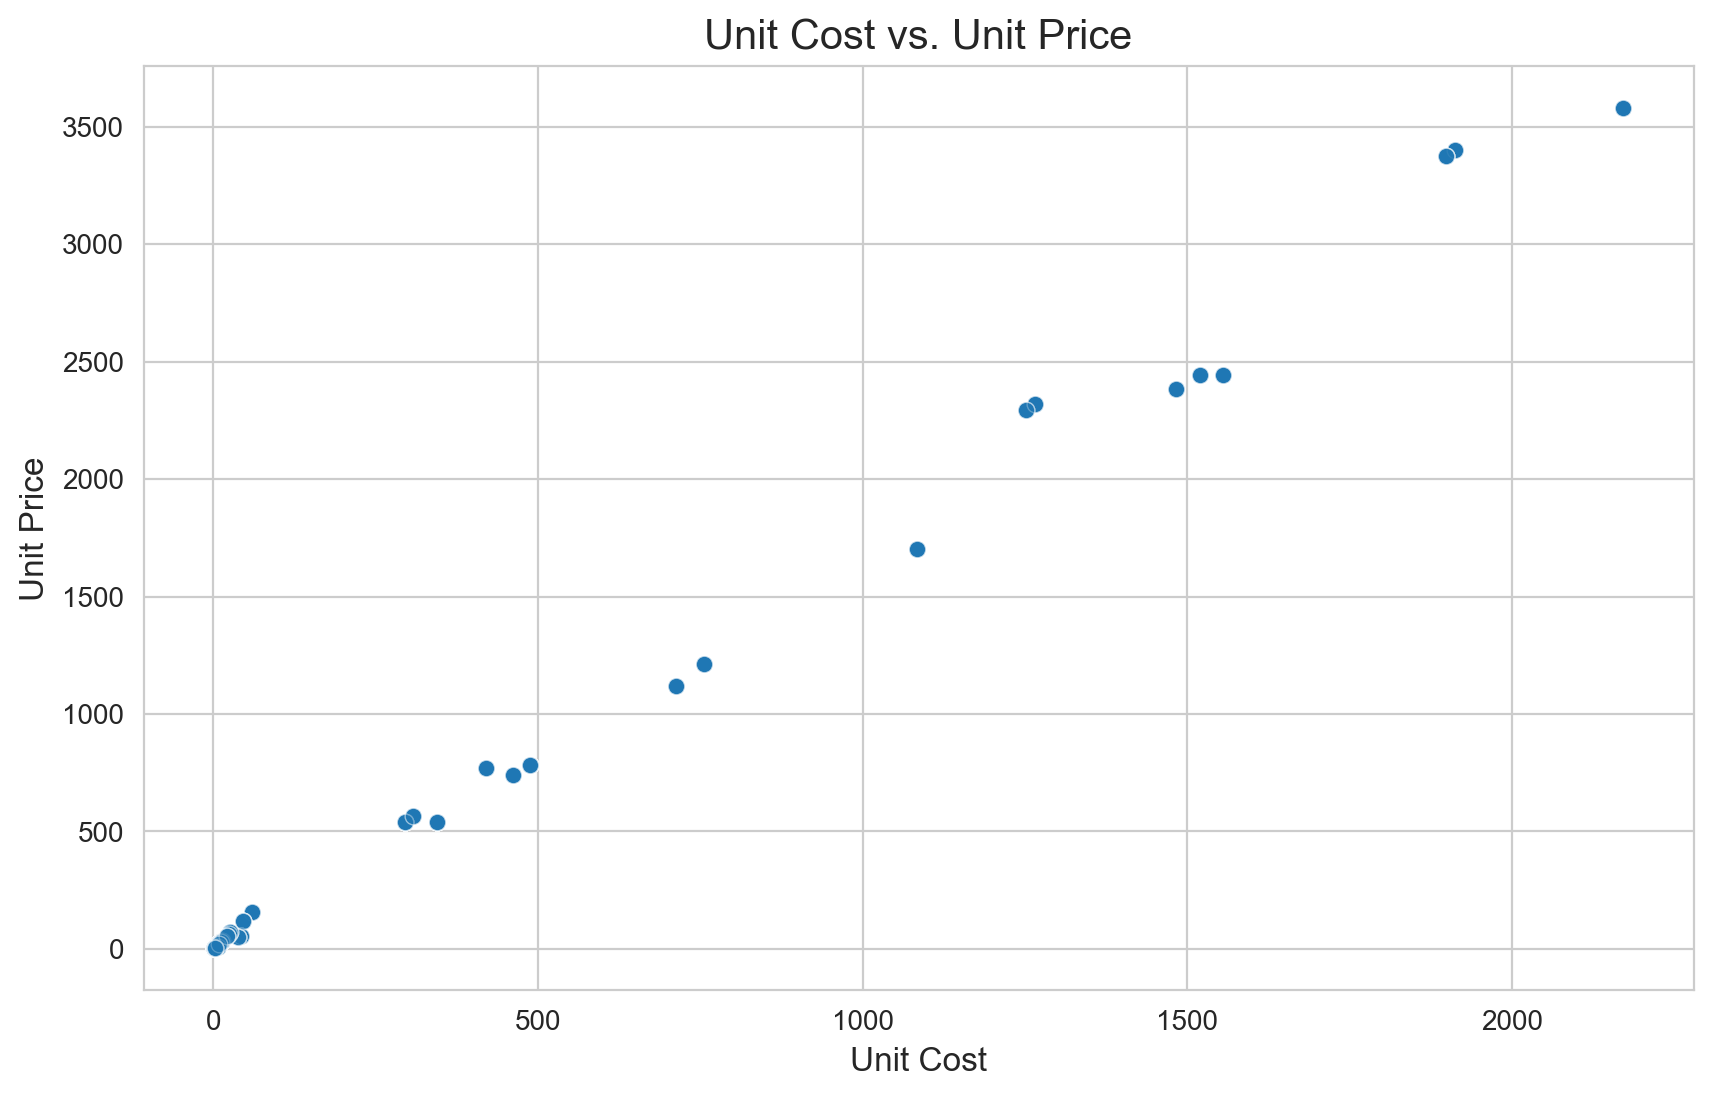

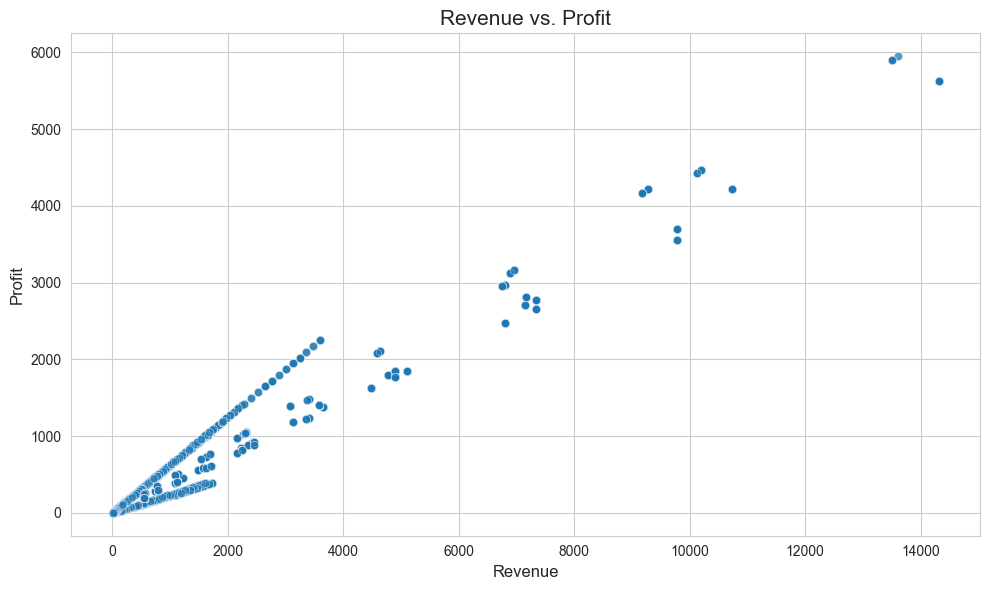

In [59]:
# Scatter Plot: Unit Cost vs. Unit Price
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=df, x='Unit_Cost', y='Unit_Price', alpha=0.5)
plt.title('Unit Cost vs. Unit Price', fontsize=15)
plt.xlabel('Unit Cost', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)

# Scatter Plot: Revenue vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Revenue', y='Profit', alpha=0.5)
plt.title('Revenue vs. Profit', fontsize=15)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.tight_layout()
plt.show()

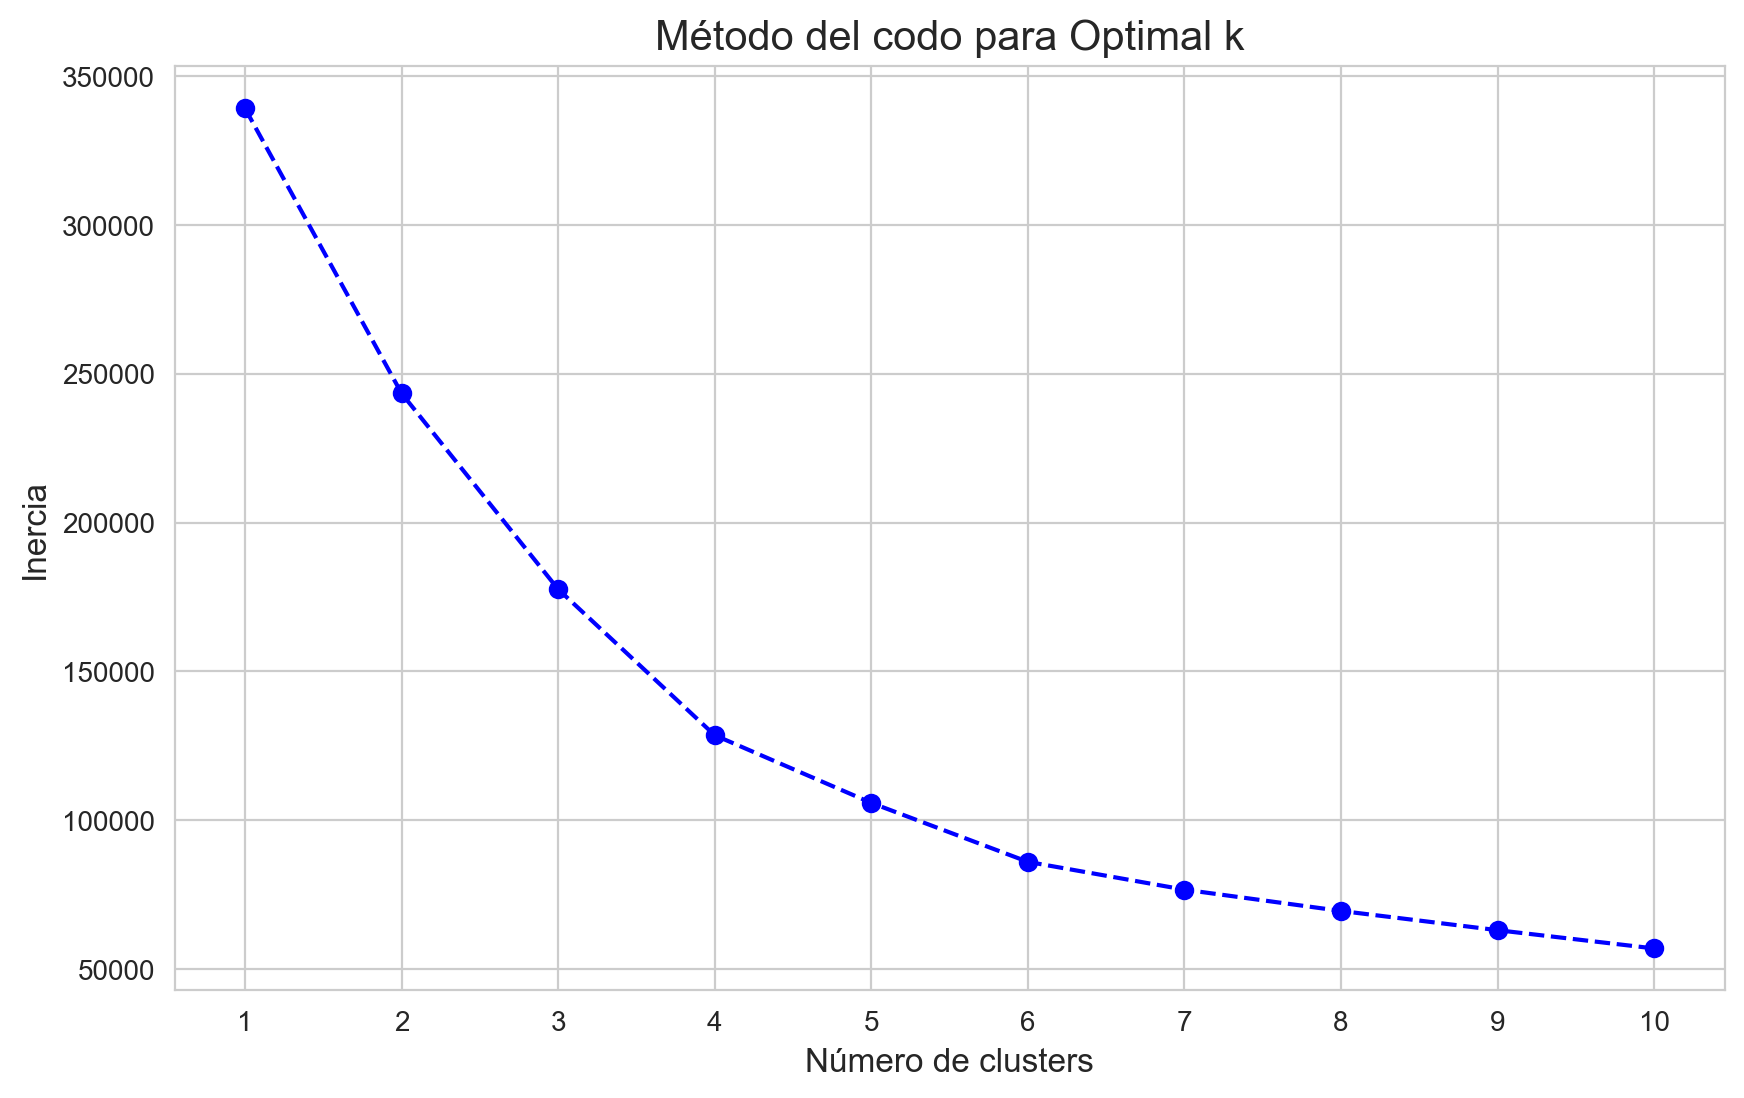

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Elegir las features para el clustering
features = df[['Customer_Age','Order_Quantity', 'Profit']]
# escalado
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Metodo del codo para elegir el numero de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='blue')
plt.title('Método del codo para Optimal k', fontsize=15)
plt.xlabel('Número de clusters', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

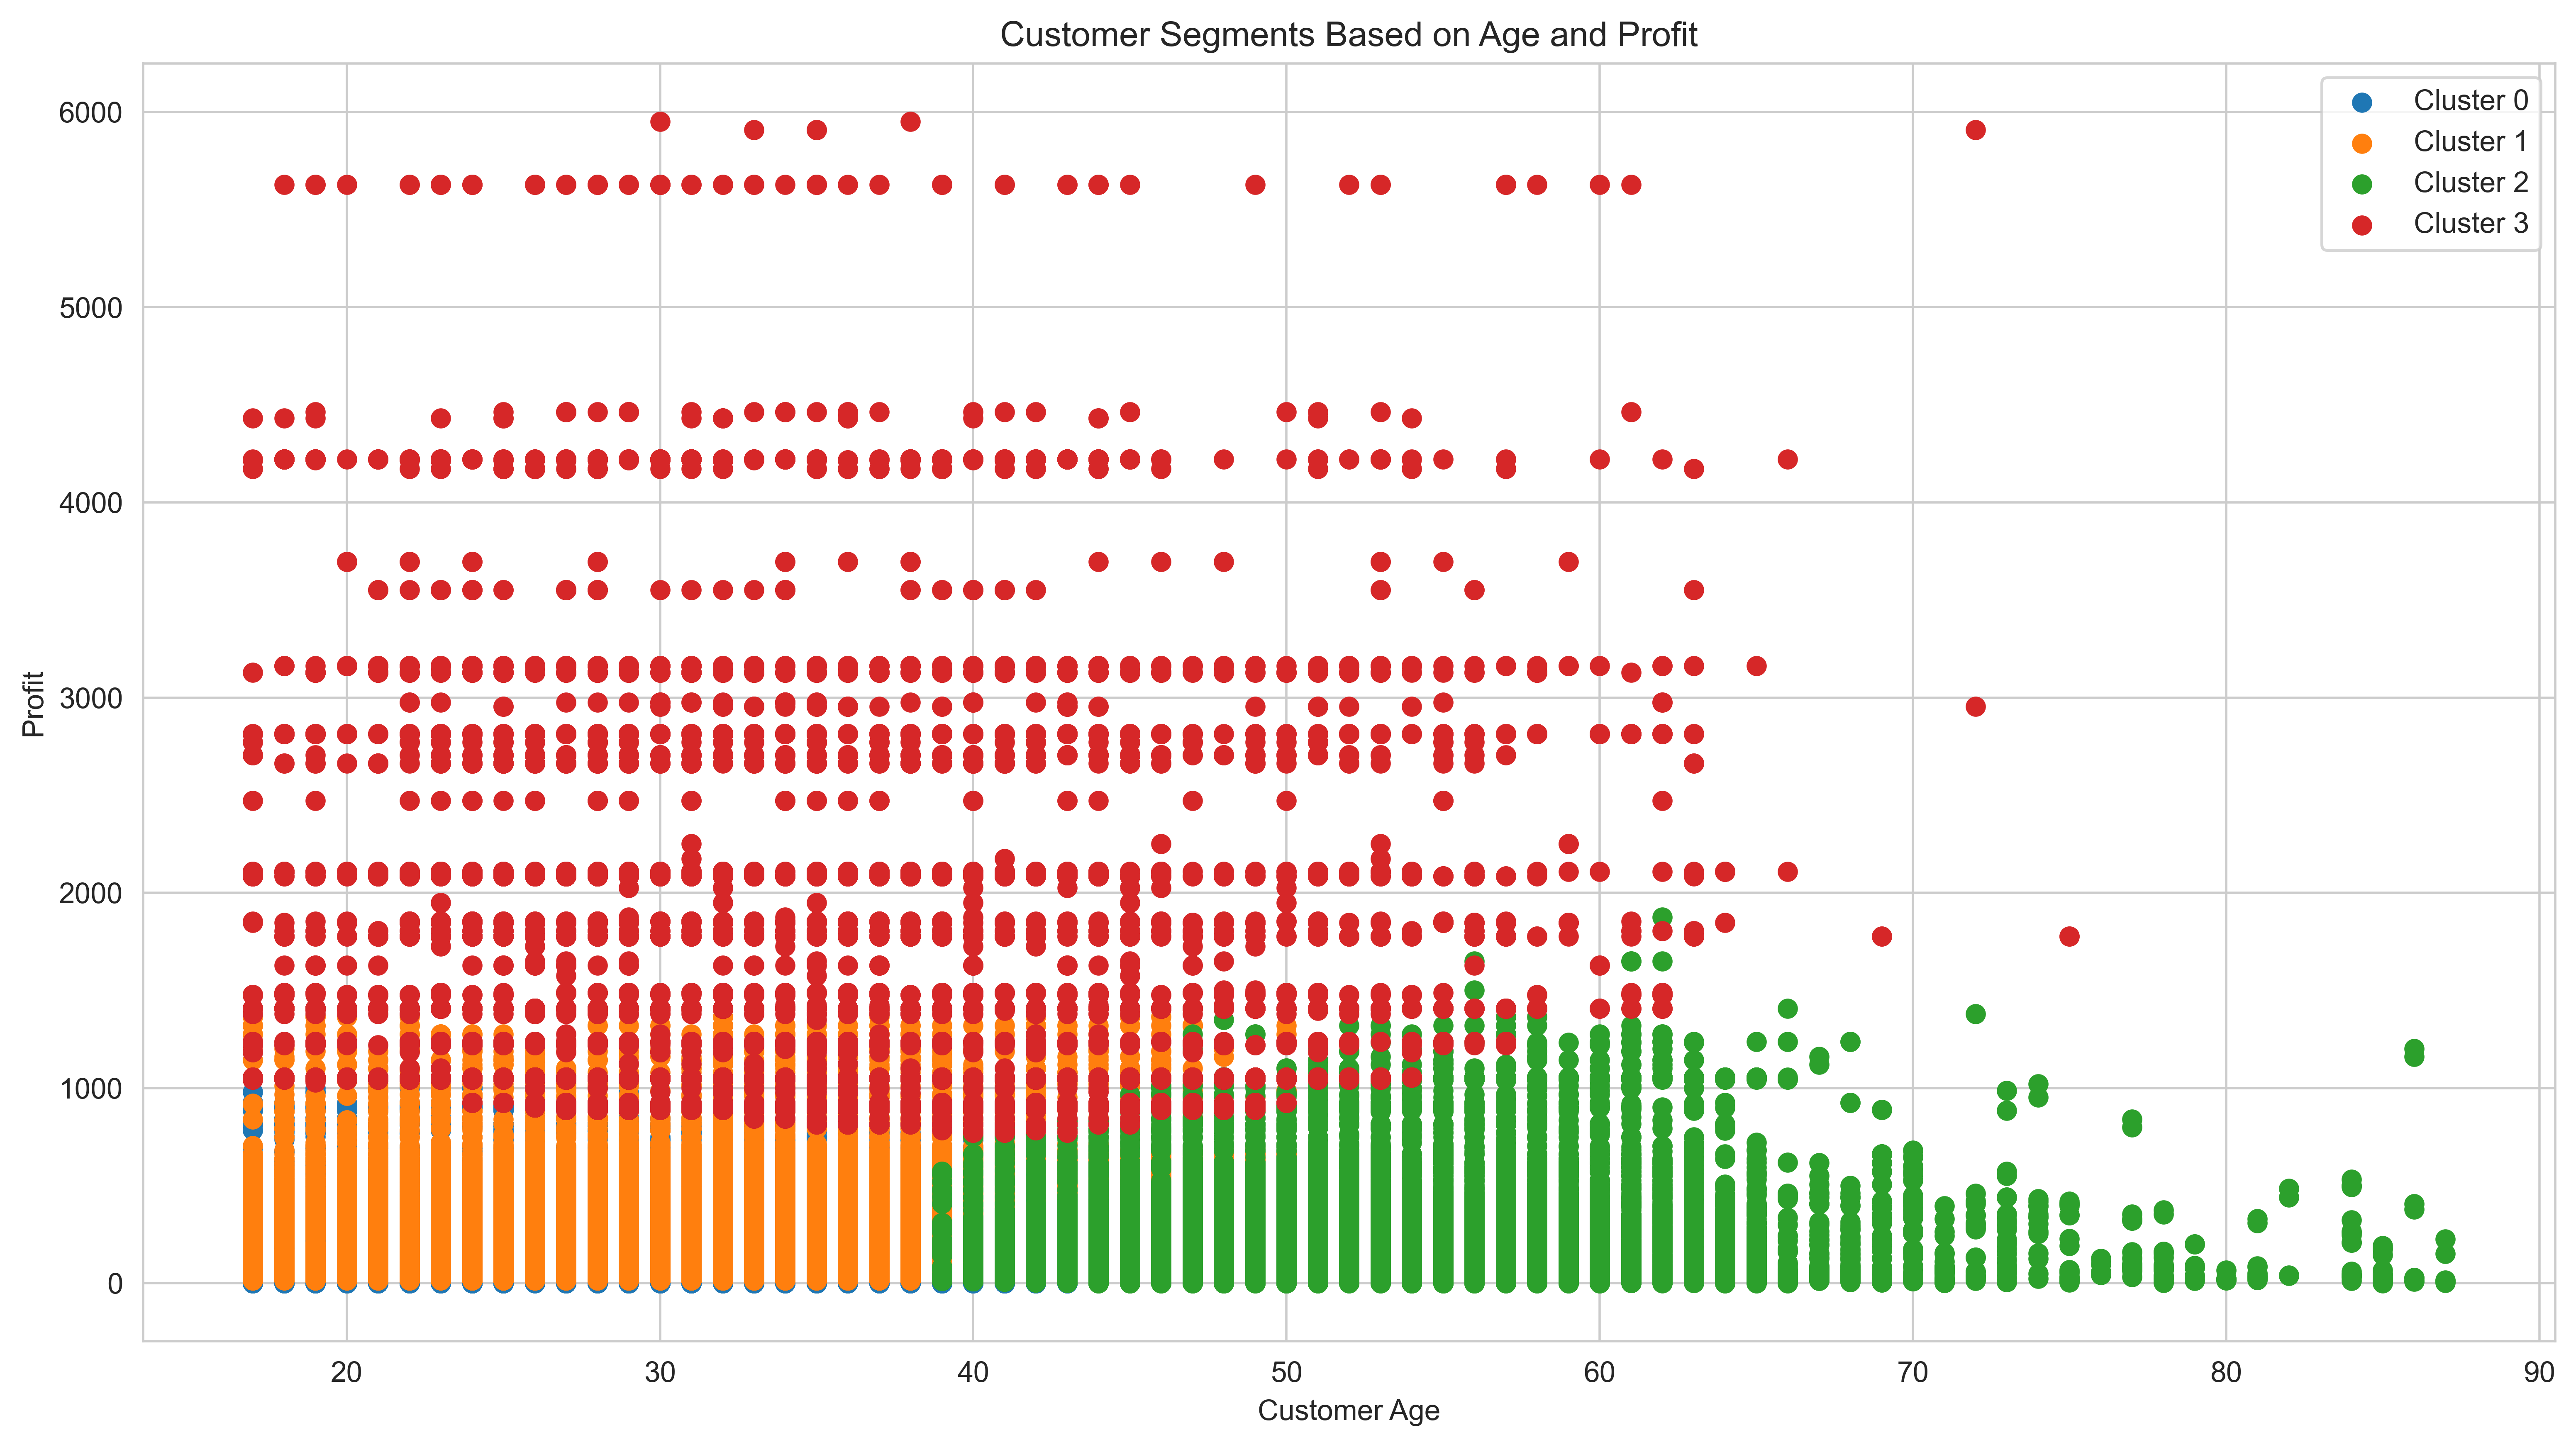

Customer_Age  Order_Quantity       Profit
0     29.692556        5.697470   157.979751
1     31.616551       22.741325   233.918965
2     50.575986       12.359540   191.734389
3     35.231769        1.652279  1546.533512

In [68]:
# ajustar el numero de clusters
n_clusters = 4

# hacer Kmeans con el numero de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)

# 
df['Cluster'] = kmeans.labels_

# 
plt.figure(figsize=(15, 8), dpi=500
           )
for i in range(n_clusters):
    # 
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Customer_Age'], cluster_data['Profit'], label=f'Cluster {i}')
plt.title('Customer Segments Based on Age and Profit')
plt.xlabel('Customer Age')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Mostrar los centroides para su interpretación
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['Customer_Age','Order_Quantity', 'Profit'])
centroids_df

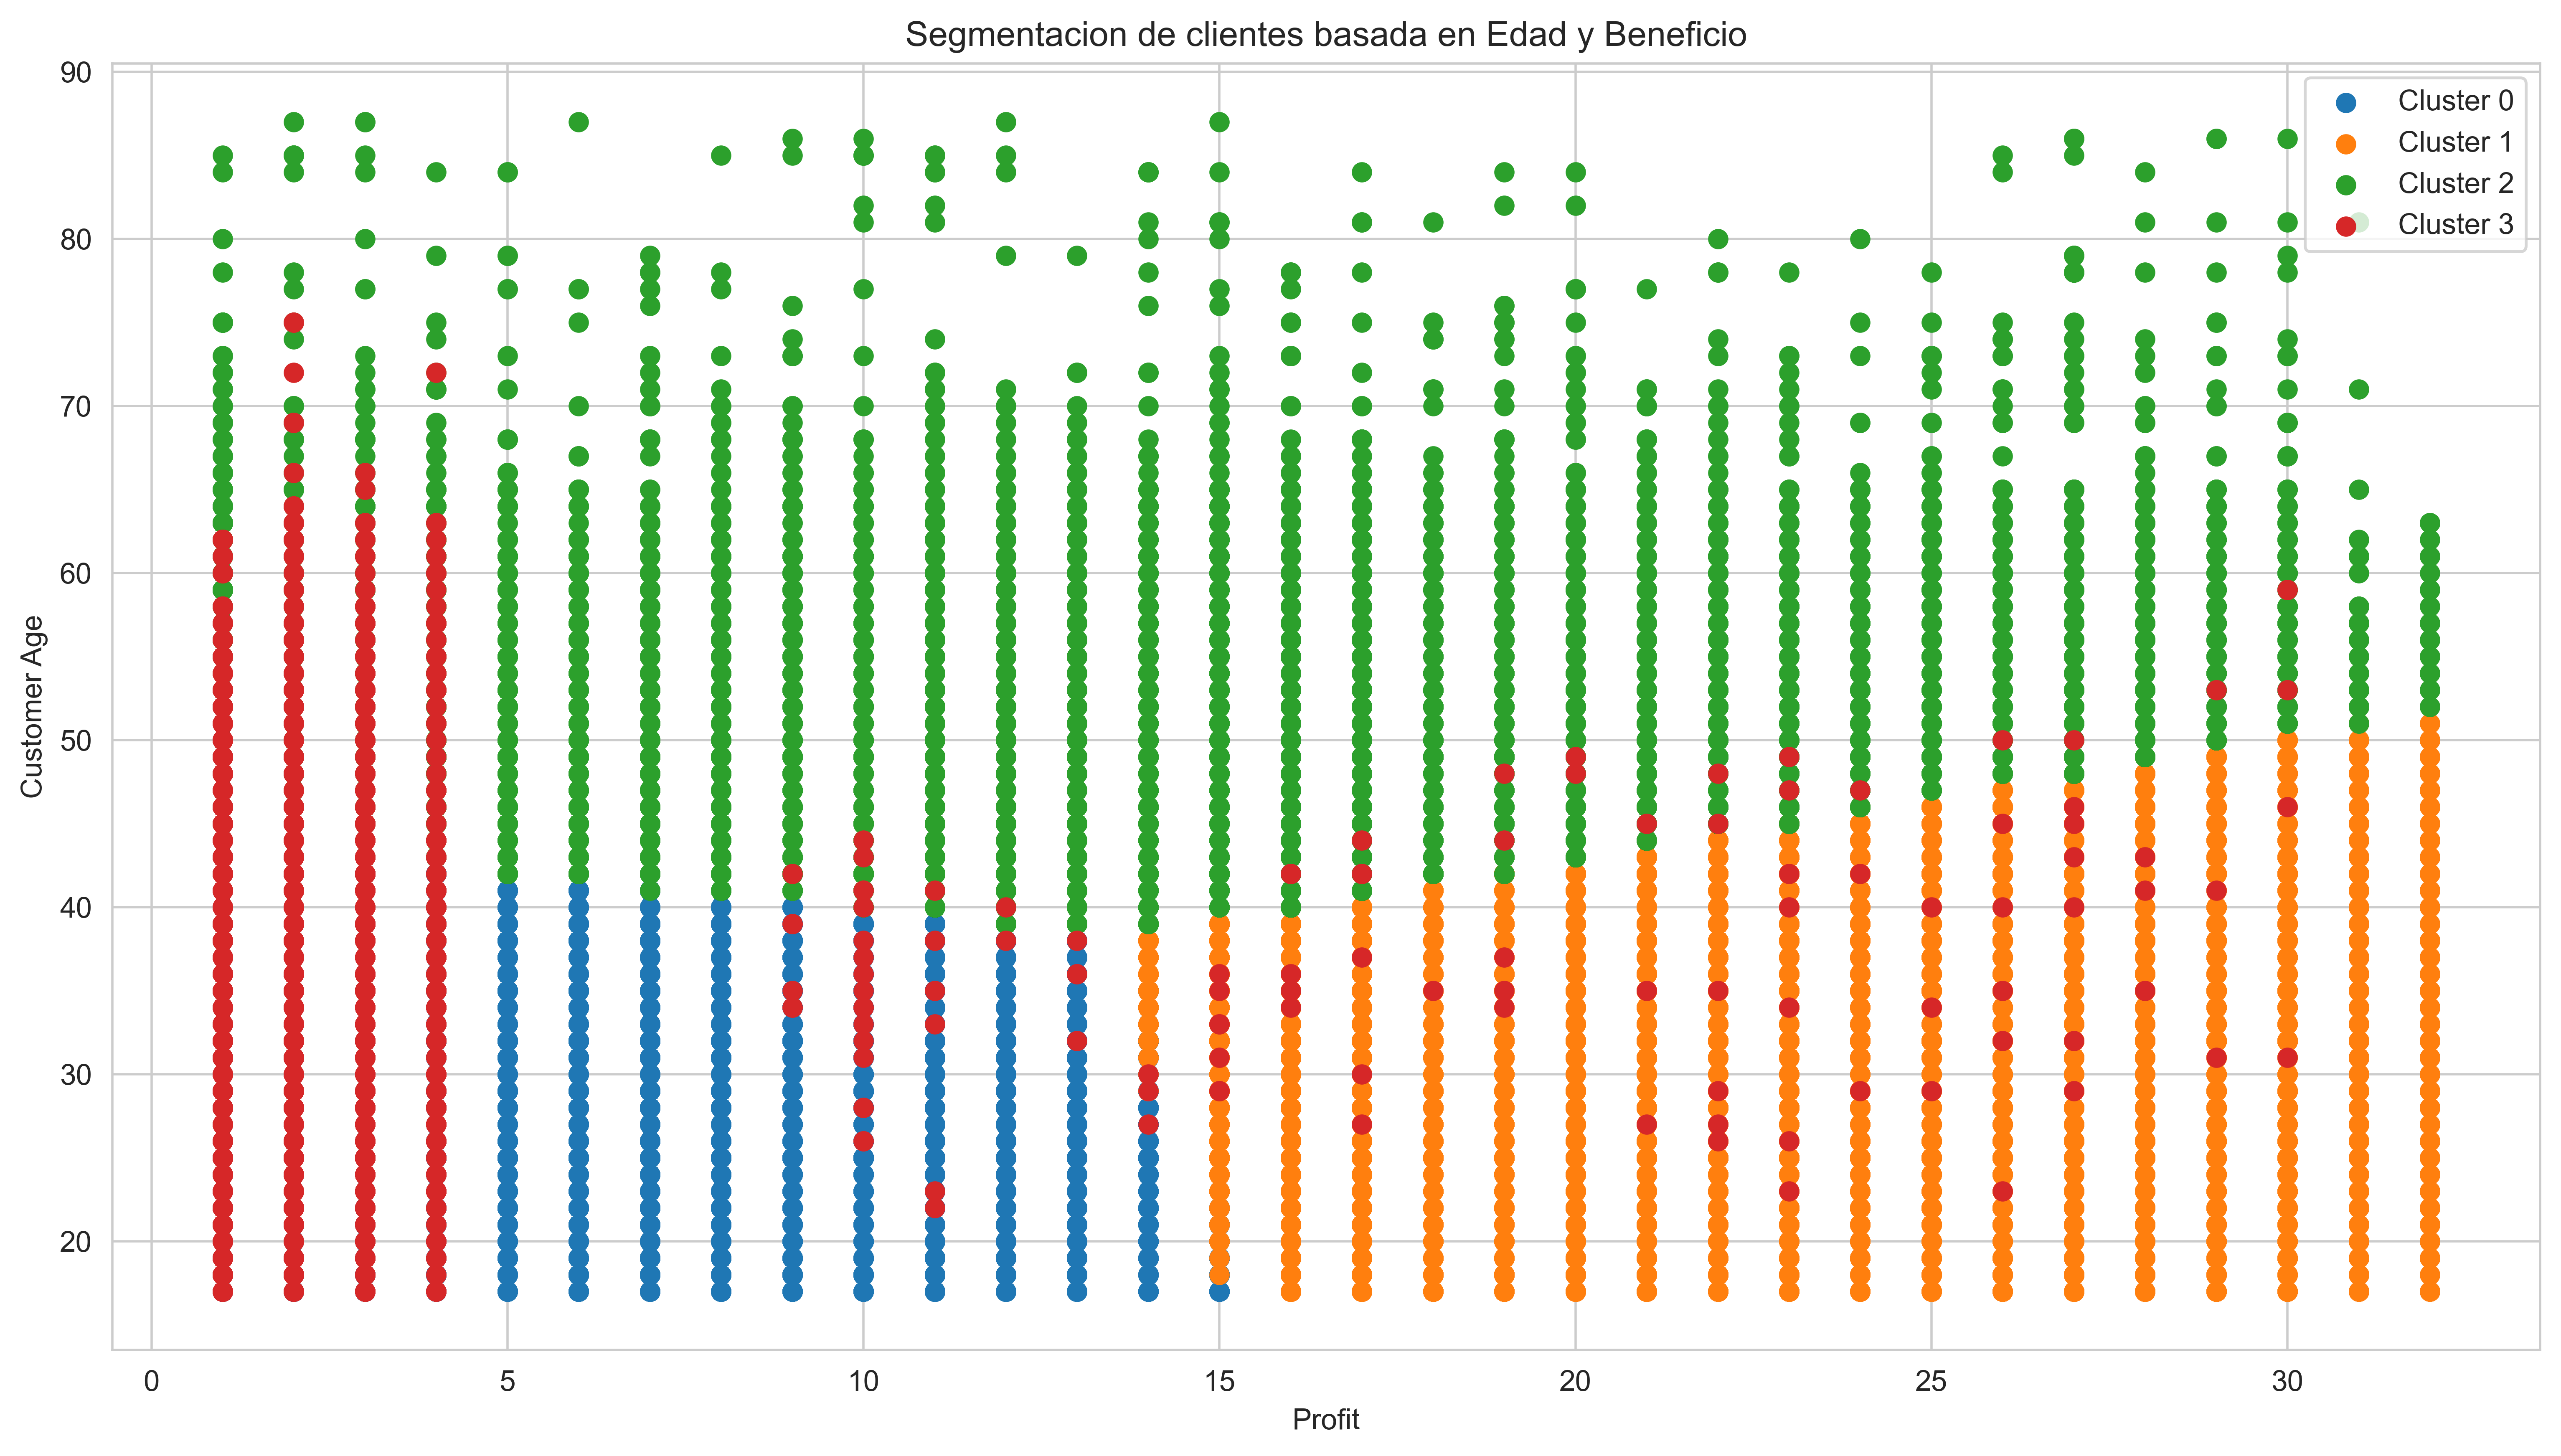

Customer_Age  Order_Quantity       Profit
0     29.692556        5.697470   157.979751
1     31.616551       22.741325   233.918965
2     50.575986       12.359540   191.734389
3     35.231769        1.652279  1546.533512

In [81]:
#
n_clusters = 4

# 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_scaled)

# 
df['Cluster'] = kmeans.labels_

# 
plt.figure(figsize=(15, 8), dpi=500
           )
for i in range(n_clusters):
    # 
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Order_Quantity'], cluster_data['Customer_Age'], label=f'Cluster {i}')
plt.title('Segmentacion de clientes basada en Edad y Beneficio')
plt.xlabel('Profit')
plt.ylabel('Customer Age')
plt.legend()
plt.show()

# Mostrar los centroides
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['Customer_Age','Order_Quantity', 'Profit'])
centroids_df

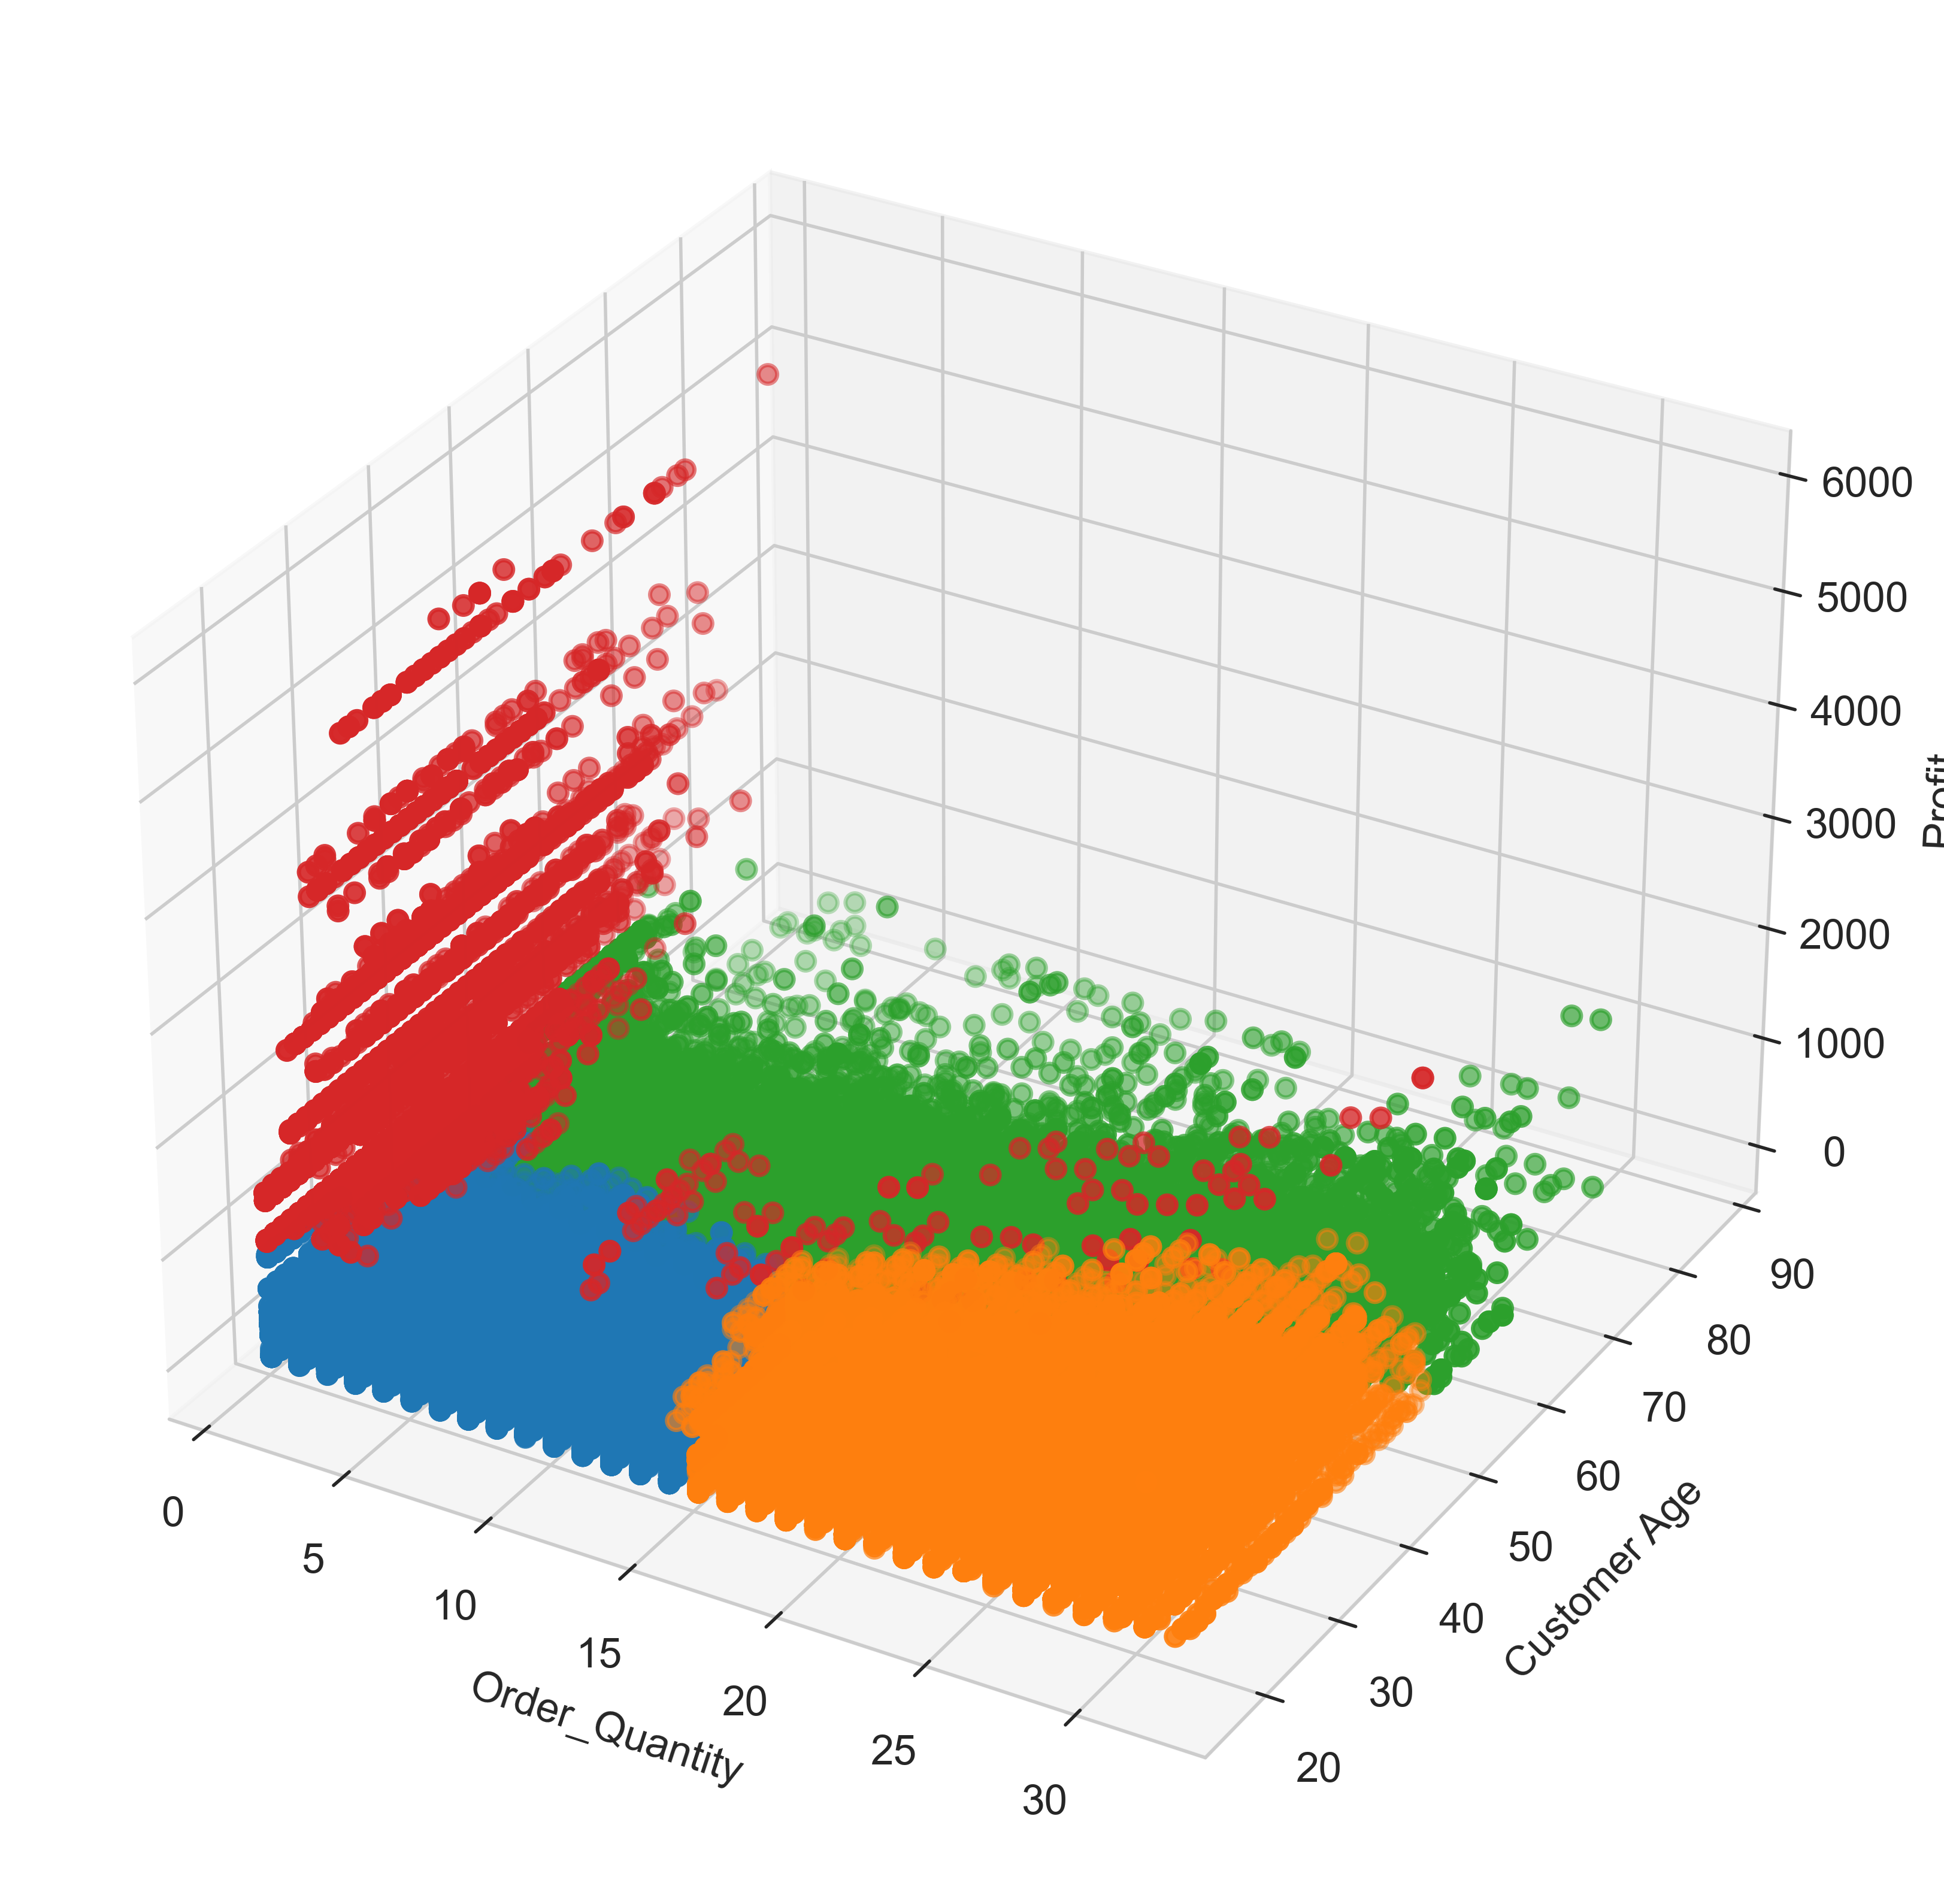

In [86]:

fig = plt.figure(figsize=(15, 8), dpi=500
           )
ax = fig.add_subplot(projection='3d')

for i in range(n_clusters):
    # plt data points en el cluster
    cluster_data = df[df['Cluster'] == i]
    ax.scatter(cluster_data['Order_Quantity'], cluster_data['Customer_Age'], cluster_data['Profit'],label=f'Cluster {i}')
ax.set_xlabel('Order_Quantity')
ax.set_ylabel('Customer Age')
ax.set_zlabel ('Profit')
plt.show()



In [64]:
print(df['Cluster'].value_counts())

Cluster
0    37238
1    34267
2    26601
3    14928
Name: count, dtype: int64


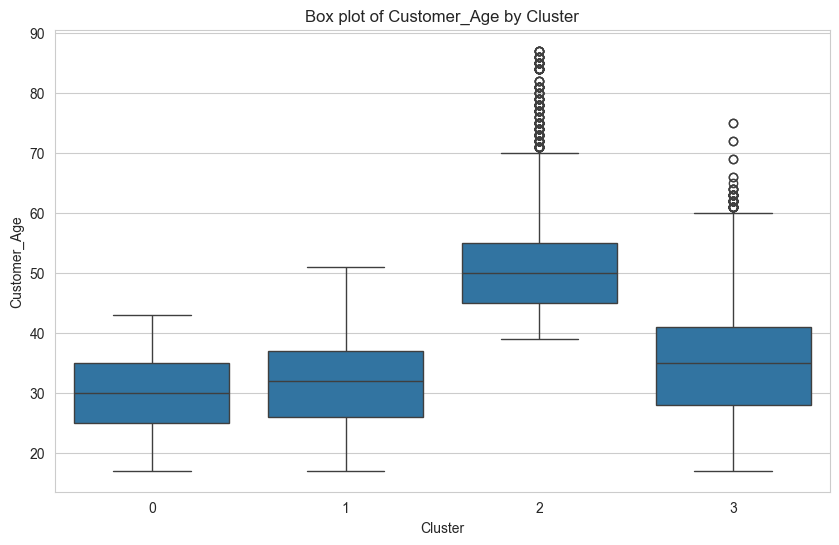

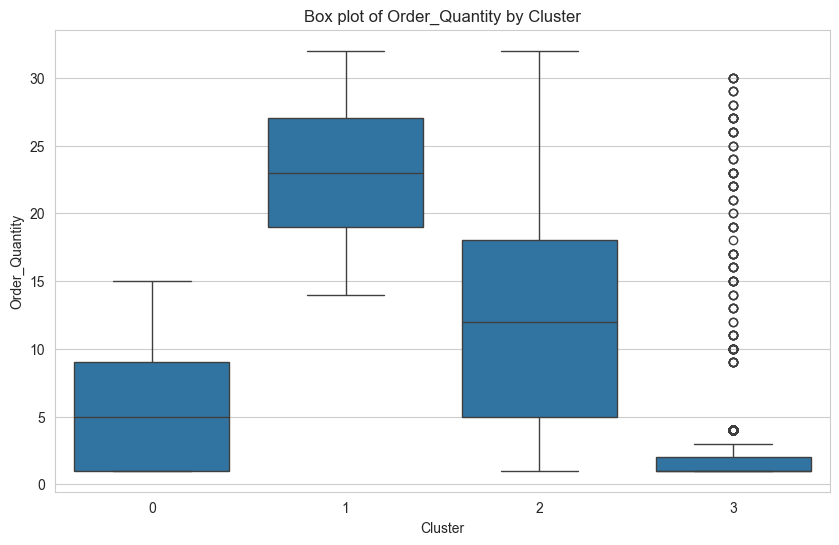

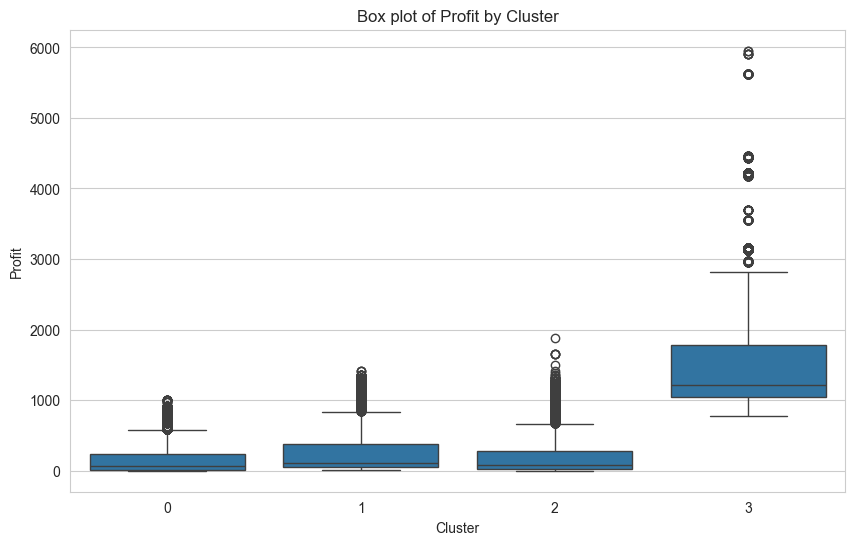

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Cluster'] = df['Cluster'].astype('category')

variables_to_plot = ['Customer_Age', 'Order_Quantity', 'Profit']

# Crear un diagrama de caja y bigotes para cada variable
for variable in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=variable, data=df)
    plt.title(f'Box plot of {variable} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.show()

In [65]:
print(cluster_data['Profit'].describe())

count    14928.000000
mean      1546.174437
std        826.068754
min        771.000000
25%       1043.000000
50%       1221.000000
75%       1776.000000
max       5952.000000
Name: Profit, dtype: float64


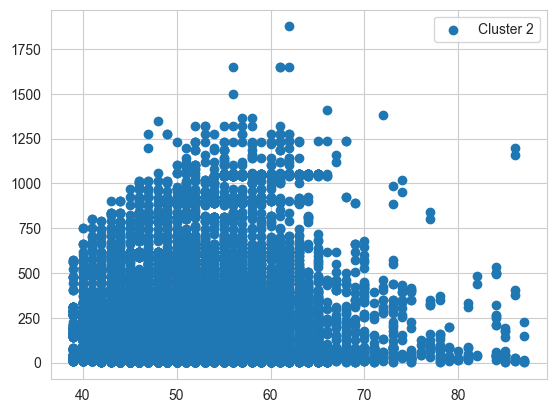

In [66]:
plt.scatter(df[df['Cluster'] == 2]['Customer_Age'], df[df['Cluster'] == 2]['Profit'], label='Cluster 2')
plt.legend()
plt.show()

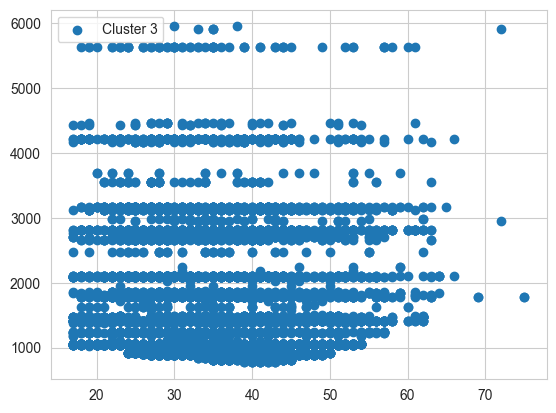

In [67]:
plt.scatter(df[df['Cluster'] == 3]['Customer_Age'], df[df['Cluster'] == 3]['Profit'], label='Cluster 3')
plt.legend()
plt.show()